In [3]:
# =============================================================================
# Install Required Packages
# =============================================================================
!pip install factor_analyzer
!pip install yellowbrick

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
from scipy import stats
from scipy.stats import chi2
from factor_analyzer.factor_analyzer import calculate_kmo

# =============================================================================
# Configuration and Setup
# =============================================================================
CONFIG = {
    'correlation_threshold': 0.8,
    'kmo_threshold': 0.6,
    'variance_threshold': 1e-10,
    'cluster_confidence_bins': [0, 0.45, 0.52, 1.0],
    'boundary_threshold': 0.1,
    'random_state': 42,
    'required_columns': [
        'PM25', 'OZONE', 'DSLPM', 'RSEI_AIR', 'DWATER', 'NO2',
        'PTSDF', 'PTRAF', 'PNPL', 'PWDIS',
        # Add all your required columns here
    ]
}

# =============================================================================
# Step 1: Data Preparation
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

def validate_input_data(df, required_columns=CONFIG['required_columns']):
    """Validate input data meets requirements"""
    assert len(df) > 0, "DataFrame is empty"
    missing_cols = set(required_columns) - set(df.columns)
    assert not missing_cols, f"Missing required columns: {missing_cols}"
    return True

try:
    # Upload dataset interactively
    uploaded = files.upload()

    # Load the dataset
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)

    # Validate data
    validate_input_data(df)

    # Handle ID column
    if "ID" in df.columns:
        df_id = df[["ID"]]
        df = df.drop(columns=["ID"])

    print("Dataset Loaded Successfully!")
    print("Shape of dataset:", df.shape)
    print("First five rows:")
    print(df.head())

except Exception as e:
    print(f"Error in data preparation: {e}")
    raise

# =============================================================================
# Step 2: Handle Null Values
# =============================================================================
try:
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values Before Handling:\n", missing_values[missing_values > 0])

    # Handle numerical columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))

    # Handle categorical columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    df[categorical_columns] = df[categorical_columns].apply(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )

    # Verify no nulls remain
    print("\nMissing Values After Handling:\n", df.isnull().sum().sum())

except Exception as e:
    print(f"Error handling null values: {e}")
    raise

# =============================================================================
# Step 3: Data Standardization
# =============================================================================
try:
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Identify numerical columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Apply StandardScaler
    df_scaled = df.copy()
    df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Verify standardization
    print("Data Standardized Successfully!")
    print("Mean after scaling (should be ~0):\n",
          df_scaled[numeric_columns].mean().round(2))
    print("\nStandard deviation after scaling (should be ~1):\n",
          df_scaled[numeric_columns].std().round(2))

except Exception as e:
    print(f"Error in standardization: {e}")
    raise



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42657 sha256=44e83e07a348ea53ca3afdcf3cf83d874105ae1227ffe24d6764666724034bba
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


Saving Clean_df_safetyindex_updated.csv to Clean_df_safetyindex_updated (1).csv
Dataset Loaded Successfully!
Shape of dataset: (93, 48)
First five rows:
   PEOPCOLORPCT  LOWINCPCT  UNEMPPCT  DISABILITYPCT  LINGISOPCT  LESSHSPCT  \
0      0.501237   0.076685  0.006587       0.095916    0.033355   0.044565   
1      0.771815   0.327176  0.067423       0.154357    0.096774   0.133784   
2      0.731086   0.276916  0.048494       0.039679    0.135111   0.171480   
3      0.889301   0.301155  0.042468       0.100787    0.143670   0.191298   
4      0.556382   0.232398  0.092181       0.134315    0.093147   0.109264   

   UNDER5PCT  OVER64PCT  LIFEEXPPCT  PRE1960PCT  ...  Work_Carpooled_P  \
0   0.057205   0.299320    0.182564    0.045257  ...          0.025731   
1   0.032364   0.072102    0.217436    0.112476  ...          0.107548   
2   0.040980   0.066440    0.169231    0.584518  ...          0.126697   
3   0.095228   0.057529    0.206154    0.102104  ...          0.081136   
4   0.04

In [21]:
"""
COMPREHENSIVE CODE EXPLANATION
============================

This code establishes the foundation for a data analysis project focused on environmental and community assessment. Here's a breakdown of what each section does:

PACKAGE INSTALLATION AND IMPORTS
------------------------------
- Installs specialized statistical packages (factor_analyzer and yellowbrick)
- Imports essential data science libraries:
  * numpy (np): For numerical computations
  * pandas (pd): For data manipulation and analysis
  * matplotlib.pyplot: For creating visualizations
  * seaborn: For enhanced statistical visualizations
  * sklearn components: For machine learning operations
  * scipy: For statistical computations

CONFIGURATION SETUP
-----------------
Creates a CONFIG dictionary that defines important thresholds and parameters:
- correlation_threshold (0.8): Maximum allowed correlation between variables
- kmo_threshold (0.6): Minimum acceptable Kaiser-Meyer-Olkin value
- variance_threshold (1e-10): Minimum acceptable variance
- cluster_confidence_bins: Defines boundaries for confidence levels
- random_state (42): Ensures reproducibility of results
- required_columns: List of environmental variables that must be present

STEP 1: DATA PREPARATION
----------------------
1. Defines a validation function to check if:
   - The dataset isn't empty
   - All required columns are present

2. Handles data loading:
   - Uses Google Colab's file upload functionality
   - Loads data into a pandas DataFrame
   - Separates ID column if present
   - Performs initial validation checks

STEP 2: NULL VALUE HANDLING
-------------------------
Implements a comprehensive approach to missing data:
1. First identifies and reports missing values
2. Handles numerical missing values by replacing with mean
3. Handles categorical missing values by replacing with mode
4. Verifies all missing values have been addressed

STEP 3: DATA STANDARDIZATION
--------------------------
Standardizes the numerical data to ensure all variables are on the same scale:
1. Identifies numerical columns
2. Uses StandardScaler to transform data so that:
   - Mean becomes 0
   - Standard deviation becomes 1
3. Verifies standardization was successful

KEY TECHNICAL CONCEPTS
--------------------
1. StandardScaler:
   - Transforms each feature by subtracting the mean and dividing by std deviation
   - Essential for features measured in different units or scales

2. Error Handling:
   - Uses try-except blocks to catch and report specific errors
   - Ensures robust execution and helpful error messages

3. Data Validation:
   - Implements checks at each stage
   - Ensures data quality and preparation for analysis

USAGE NOTES
----------
- This code is designed to run in Google Colab environment
- Requires input data with specific environmental variables
- Produces a standardized dataset ready for further analysis
- All operations are logged with appropriate success/error messages

This foundation prepares the data for:
- Factor analysis
- Cluster analysis
- Statistical modeling
- Geographic visualization
"""

"\nCOMPREHENSIVE CODE EXPLANATION\n============================\n\nThis code establishes the foundation for a data analysis project focused on environmental and community assessment. Here's a breakdown of what each section does:\n\nPACKAGE INSTALLATION AND IMPORTS\n------------------------------\n- Installs specialized statistical packages (factor_analyzer and yellowbrick)\n- Imports essential data science libraries:\n  * numpy (np): For numerical computations\n  * pandas (pd): For data manipulation and analysis\n  * matplotlib.pyplot: For creating visualizations\n  * seaborn: For enhanced statistical visualizations\n  * sklearn components: For machine learning operations\n  * scipy: For statistical computations\n\nCONFIGURATION SETUP\n-----------------\nCreates a CONFIG dictionary that defines important thresholds and parameters:\n- correlation_threshold (0.8): Maximum allowed correlation between variables\n- kmo_threshold (0.6): Minimum acceptable Kaiser-Meyer-Olkin value\n- variance


=== Environmental Group ===
Available Variables: ['PM25', 'OZONE', 'DSLPM', 'RSEI_AIR', 'DWATER', 'NO2', 'PTSDF', 'PTRAF', 'PNPL', 'PWDIS']

Summary Statistics:
               PM25         OZONE         DSLPM      RSEI_AIR  DWATER  \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01    93.0   
mean  -7.695159e-15  2.328365e-14  4.202134e-16 -6.386767e-17     0.0   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00     0.0   
min   -2.405008e+00 -2.568217e+00 -2.172332e+00 -4.914858e-01     0.0   
25%   -5.696375e-01 -6.828542e-01 -5.881978e-01 -2.634288e-01     0.0   
50%    1.878837e-01  1.390470e-01 -1.134527e-01 -9.868026e-02     0.0   
75%    7.335023e-01  7.493341e-01  4.441171e-01  6.609137e-02     0.0   
max    1.773906e+00  1.581181e+00  2.504895e+00  9.298816e+00     0.0   

                NO2         PTSDF         PTRAF          PNPL         PWDIS  
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  
mean  -3.485862e-16 -9.3

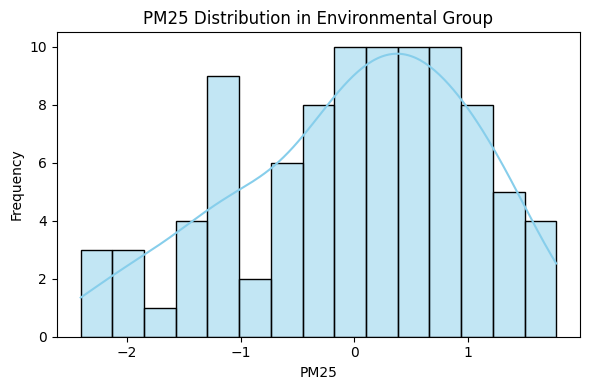

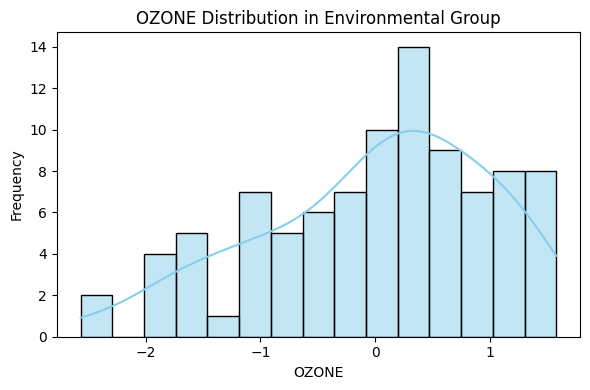

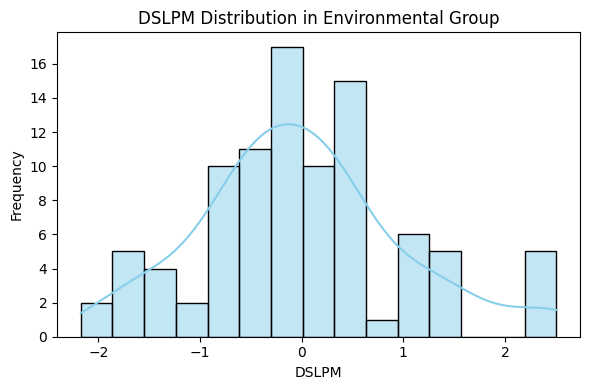

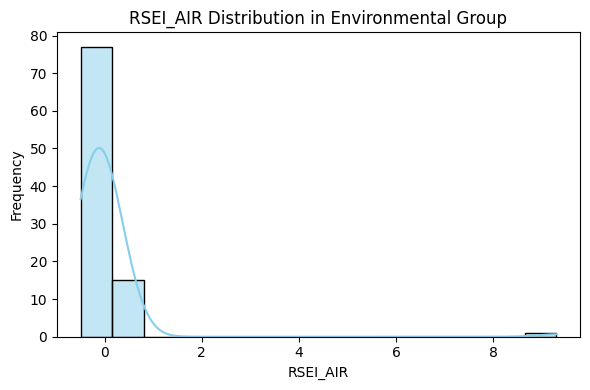

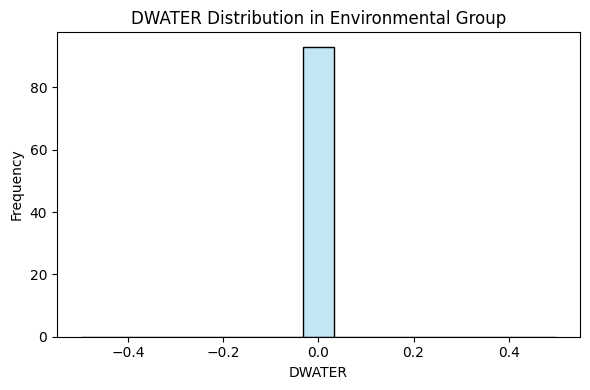

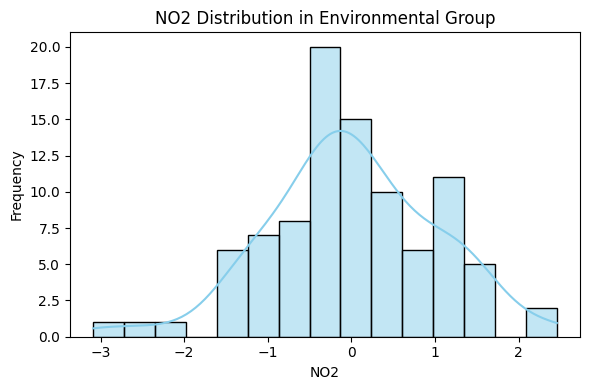

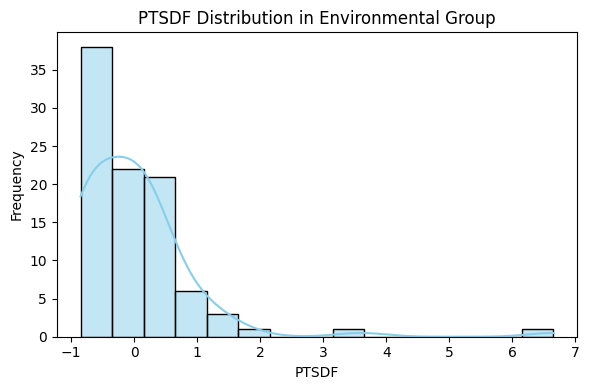

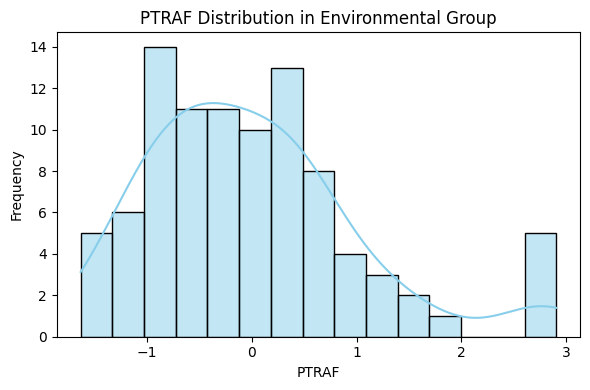

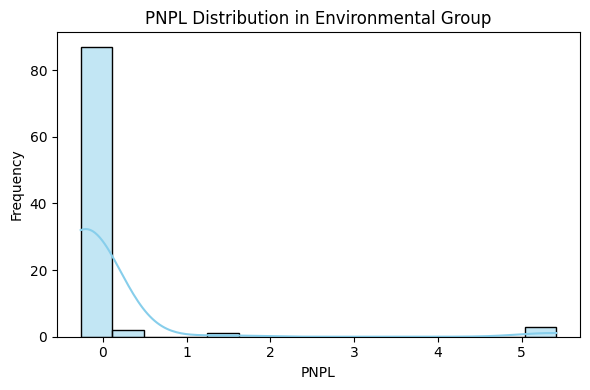

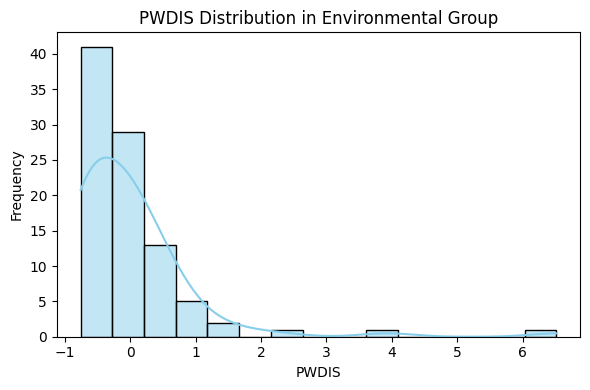

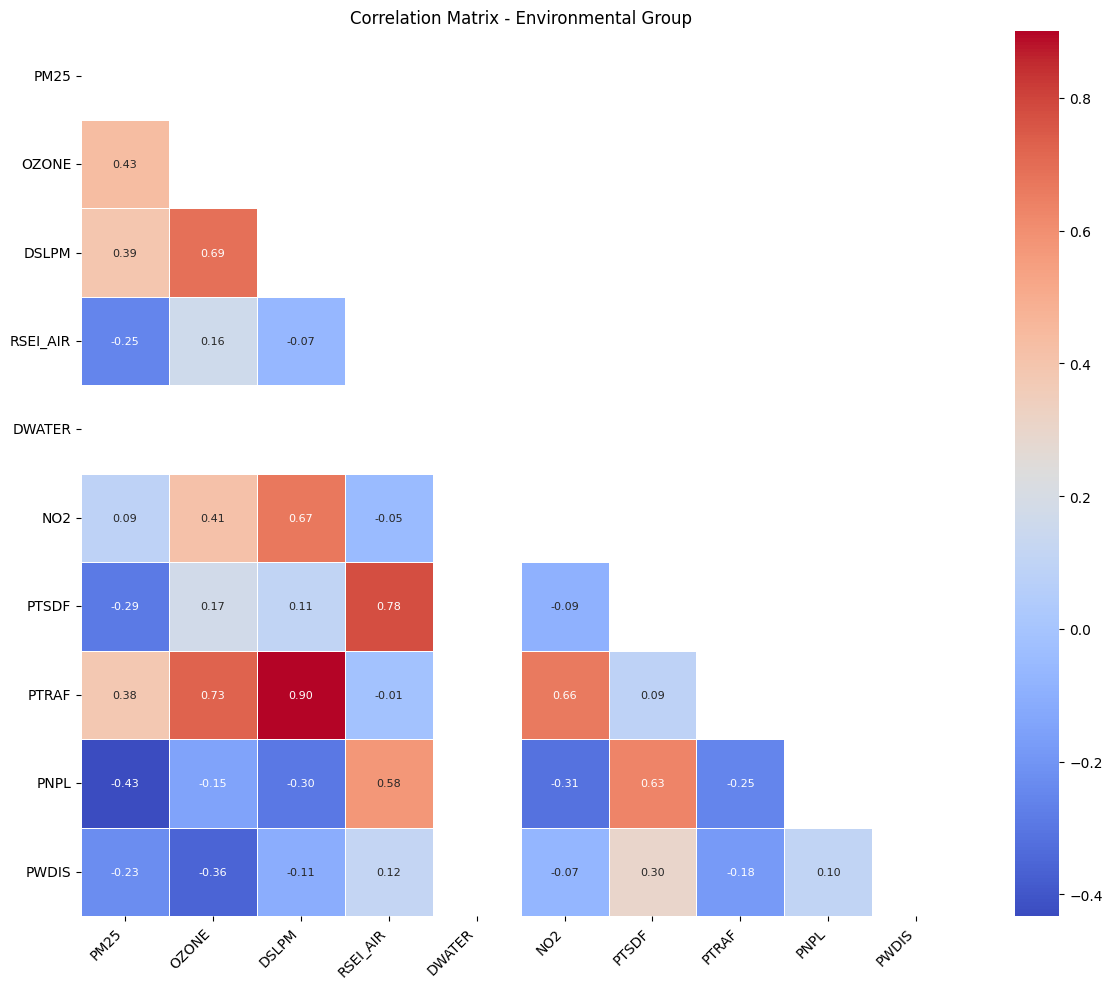


=== Socioeconomic Group ===
Available Variables: ['LOWINCPCT', 'UNEMPPCT', 'DISABILITYPCT', 'LINGISOPCT', 'LESSHSPCT', 'With_PublicAssIncome_P', 'With_SSI_P', 'E_POV150_P', 'E_UNINSUR_P', 'E_HBURD_P', 'E_SNGPNT_P', 'PEOPCOLORPCT', 'UNDER5PCT', 'OVER64PCT', 'LIFEEXPPCT', 'PRMP', 'E_TOTPOP', 'E_HU', 'E_HH']

Summary Statistics:
          LOWINCPCT      UNEMPPCT  DISABILITYPCT    LINGISOPCT     LESSHSPCT  \
count  9.300000e+01  9.300000e+01   9.300000e+01  9.300000e+01  9.300000e+01   
mean   5.968941e-17  3.820122e-17   6.207699e-17 -1.826496e-16 -2.984470e-16   
std    1.005420e+00  1.005420e+00   1.005420e+00  1.005420e+00  1.005420e+00   
min   -1.455186e+00 -1.561099e+00  -2.487632e+00 -9.769249e-01 -1.331000e+00   
25%   -8.803326e-01 -6.973421e-01  -6.996016e-01 -6.884913e-01 -7.717320e-01   
50%   -1.497114e-01 -1.362311e-01  -4.107132e-02 -3.464387e-01 -2.746504e-01   
75%    5.710464e-01  5.292884e-01   5.408881e-01  3.234937e-01  6.548474e-01   
max    2.680212e+00  4.823968e+

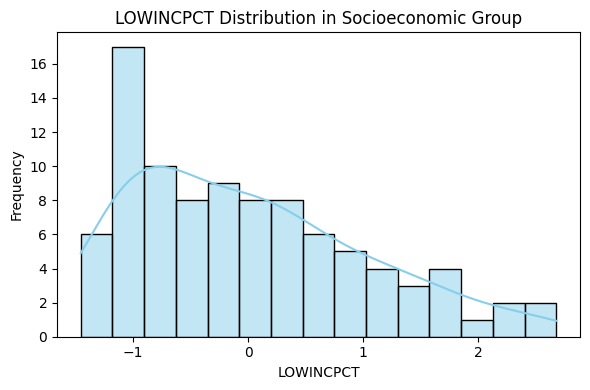

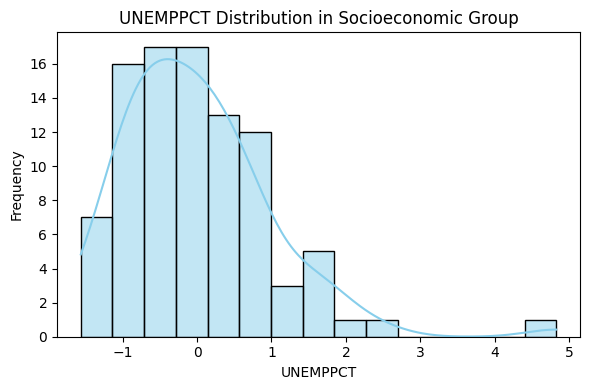

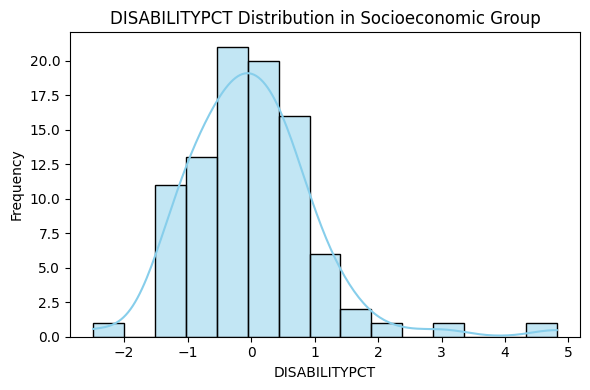

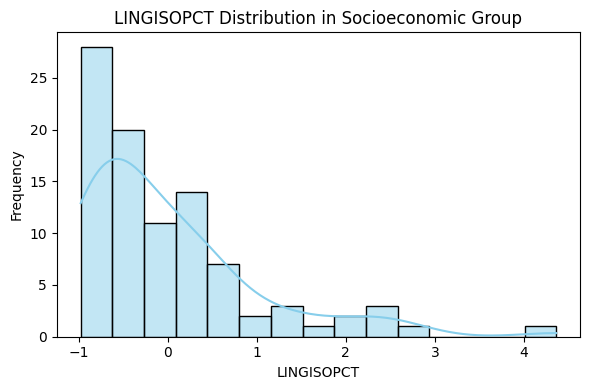

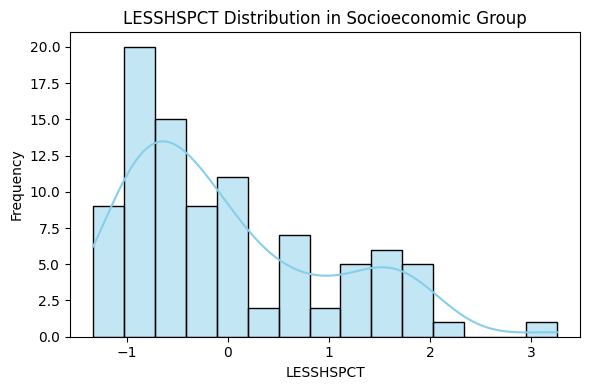

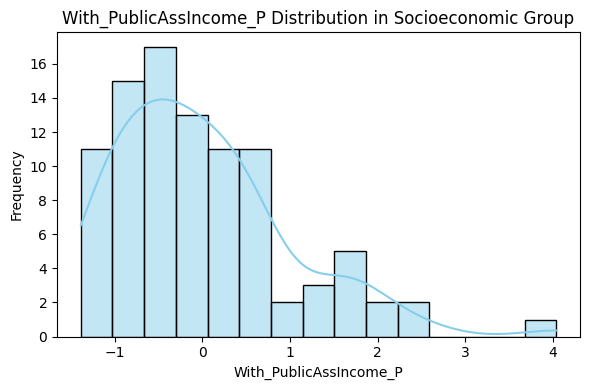

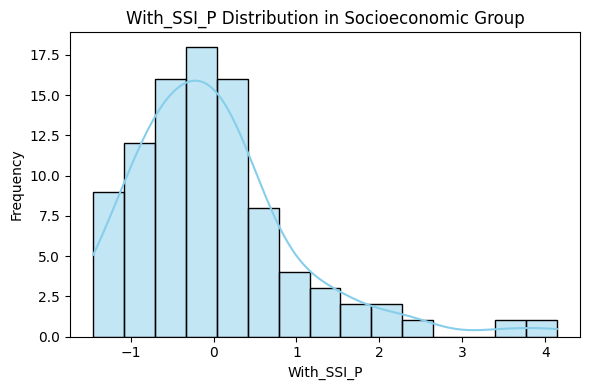

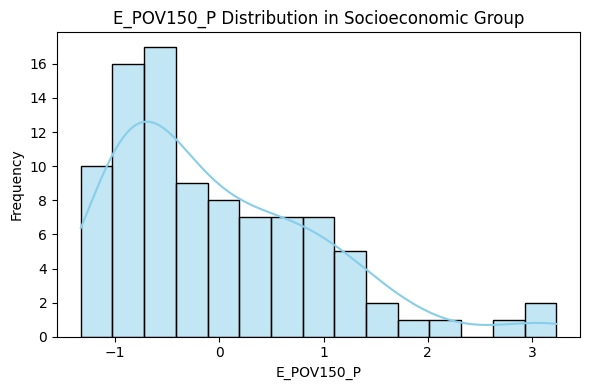

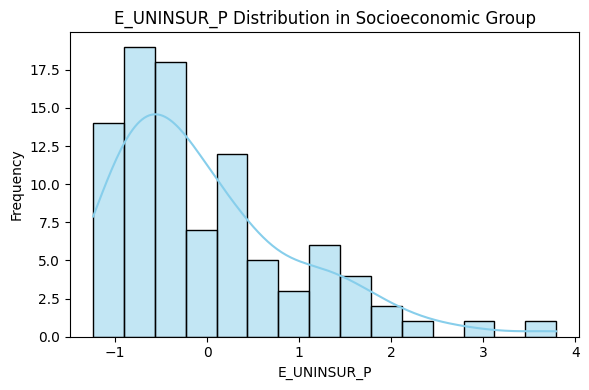

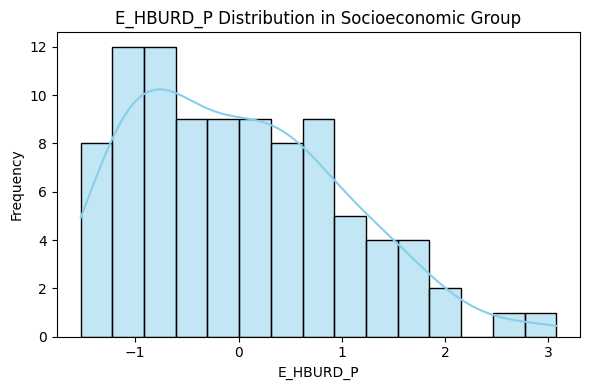

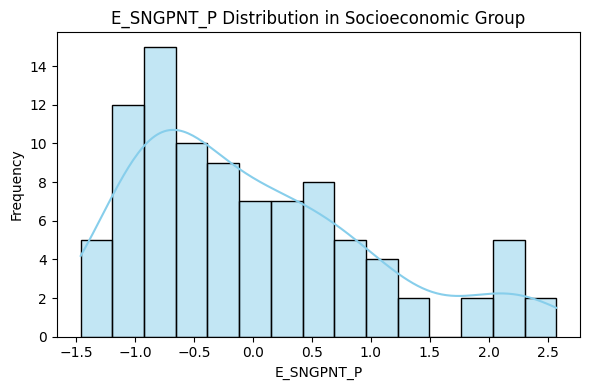

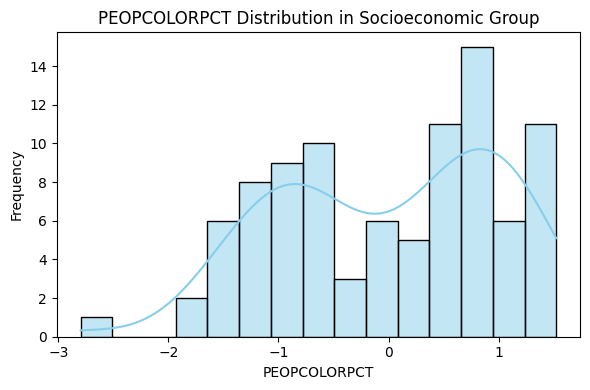

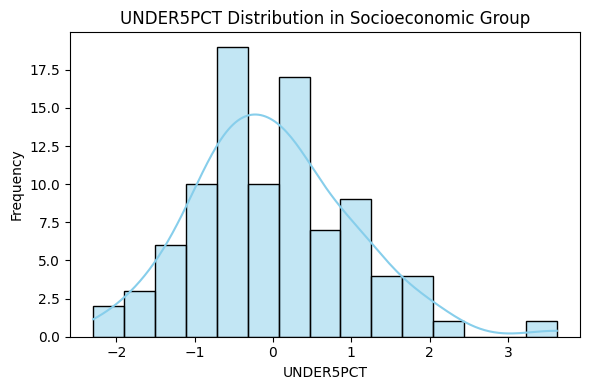

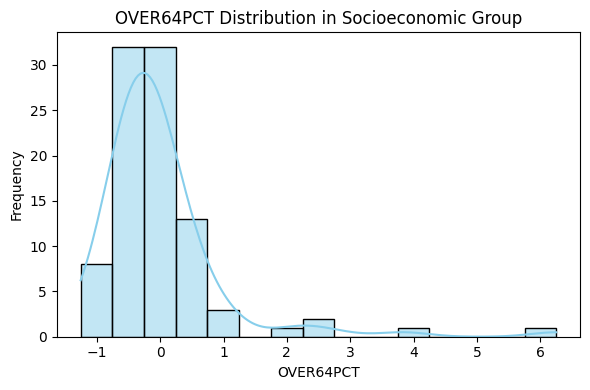

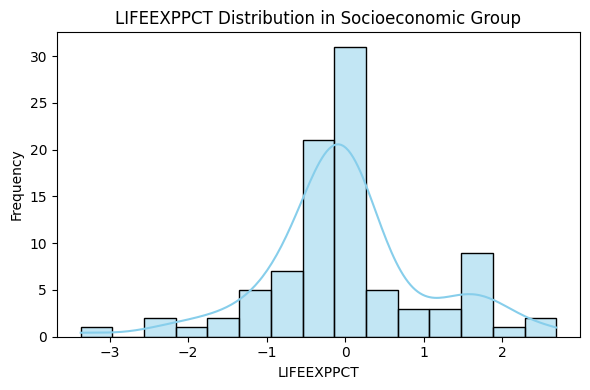

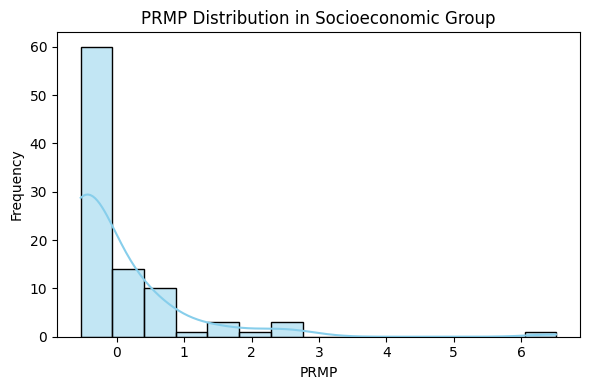

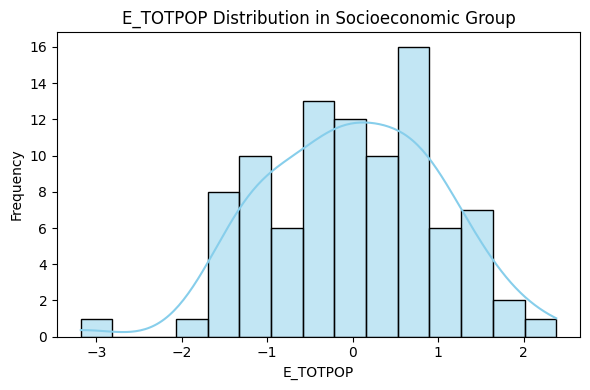

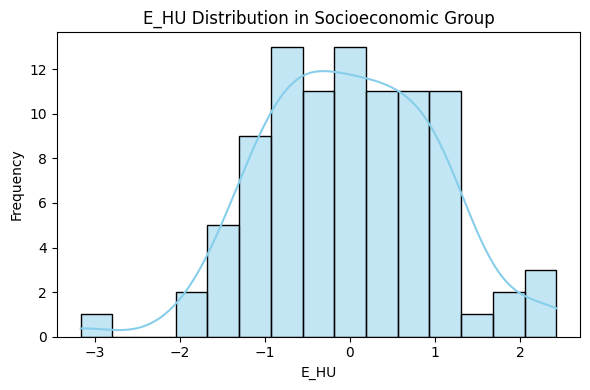

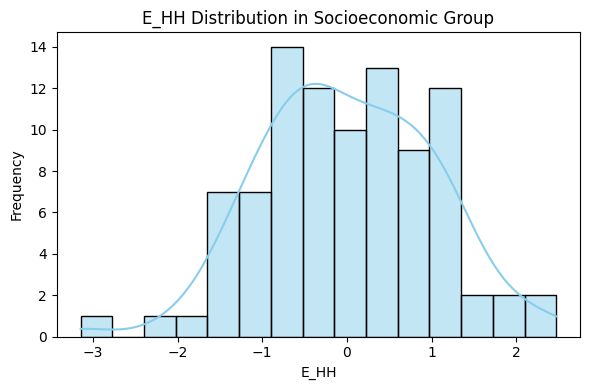

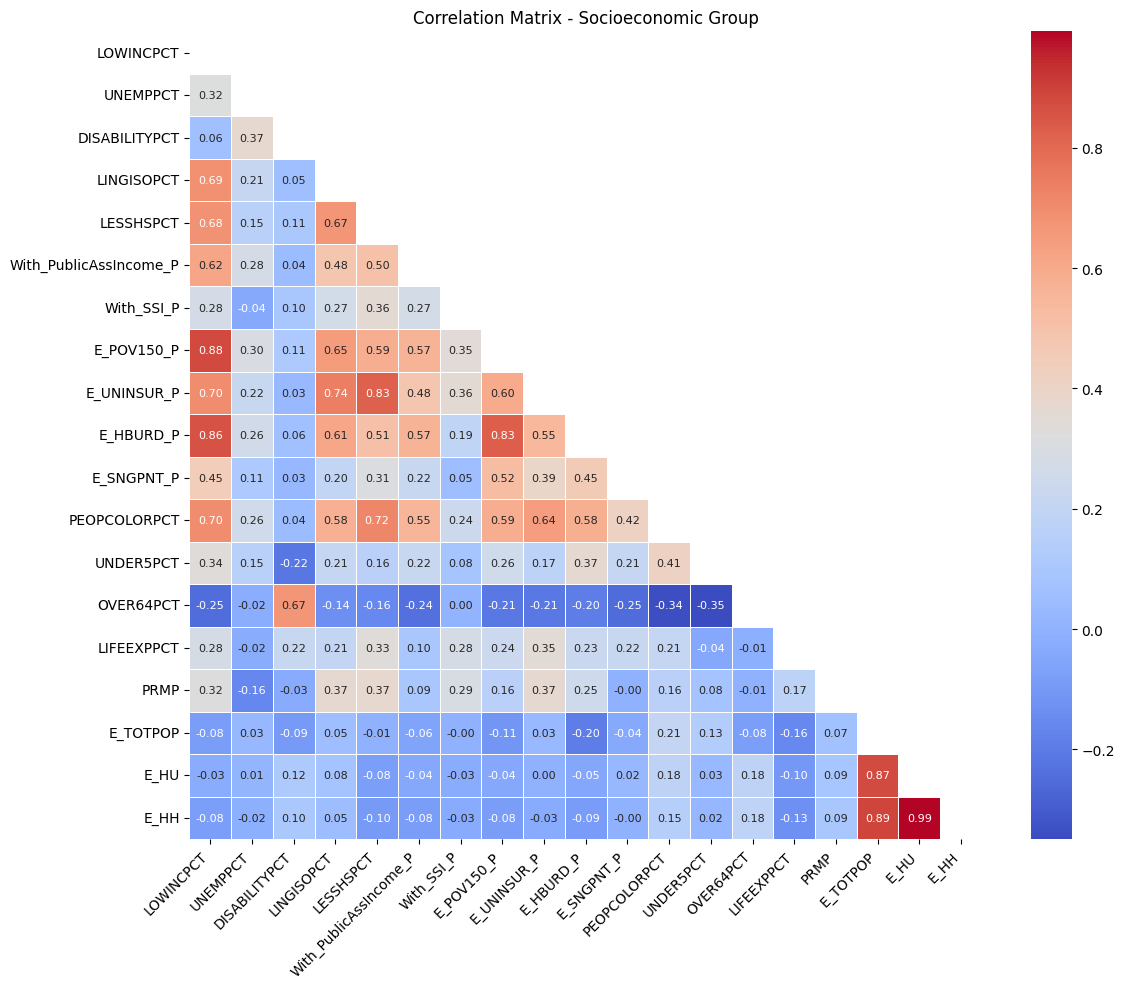


=== Protective Group ===
Available Variables: ['With_Medicaid_P', 'Owner_occupied_P', 'Mean_Proportion_HHIncome', 'Work_Fromhome_P']

Summary Statistics:
       With_Medicaid_P  Owner_occupied_P  Mean_Proportion_HHIncome  \
count     9.300000e+01      9.300000e+01              9.300000e+01   
mean     -1.169912e-16      5.761129e-16              1.683241e-16   
std       1.005420e+00      1.005420e+00              1.005420e+00   
min      -1.426504e+00     -3.394212e+00             -2.353840e+00   
25%      -9.405737e-01     -4.757868e-01             -6.833919e-01   
50%      -1.953654e-01      3.334472e-01             -7.059559e-03   
75%       8.046244e-01      7.210939e-01              5.540075e-01   
max       2.682941e+00      1.083750e+00              2.112479e+00   

       Work_Fromhome_P  
count     9.300000e+01  
mean     -5.109413e-16  
std       1.005420e+00  
min      -2.062202e+00  
25%      -7.316620e-01  
50%      -1.428976e-01  
75%       7.652771e-01  
max       3.26

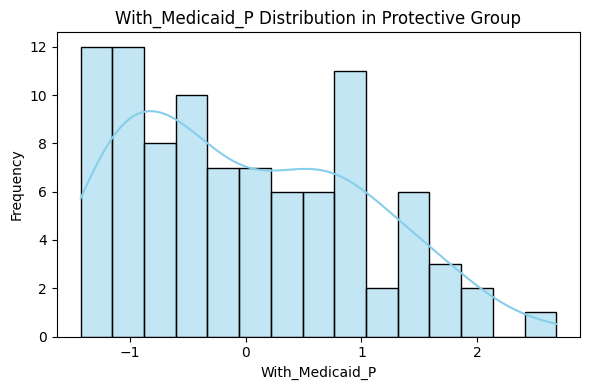

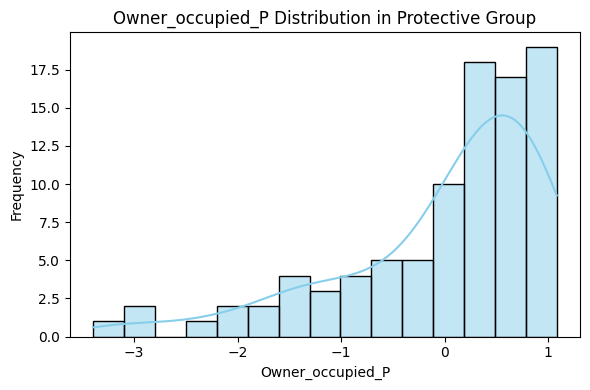

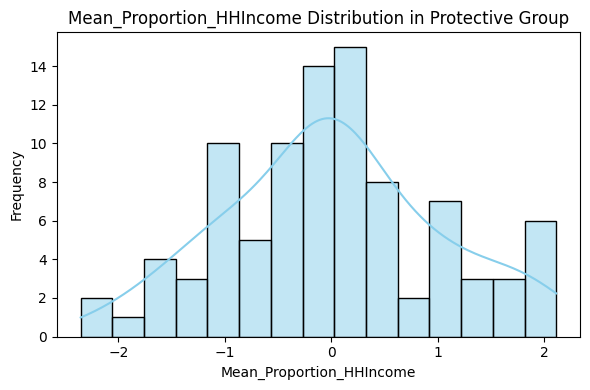

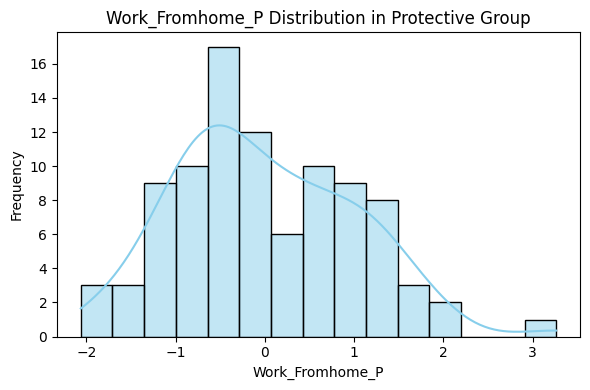

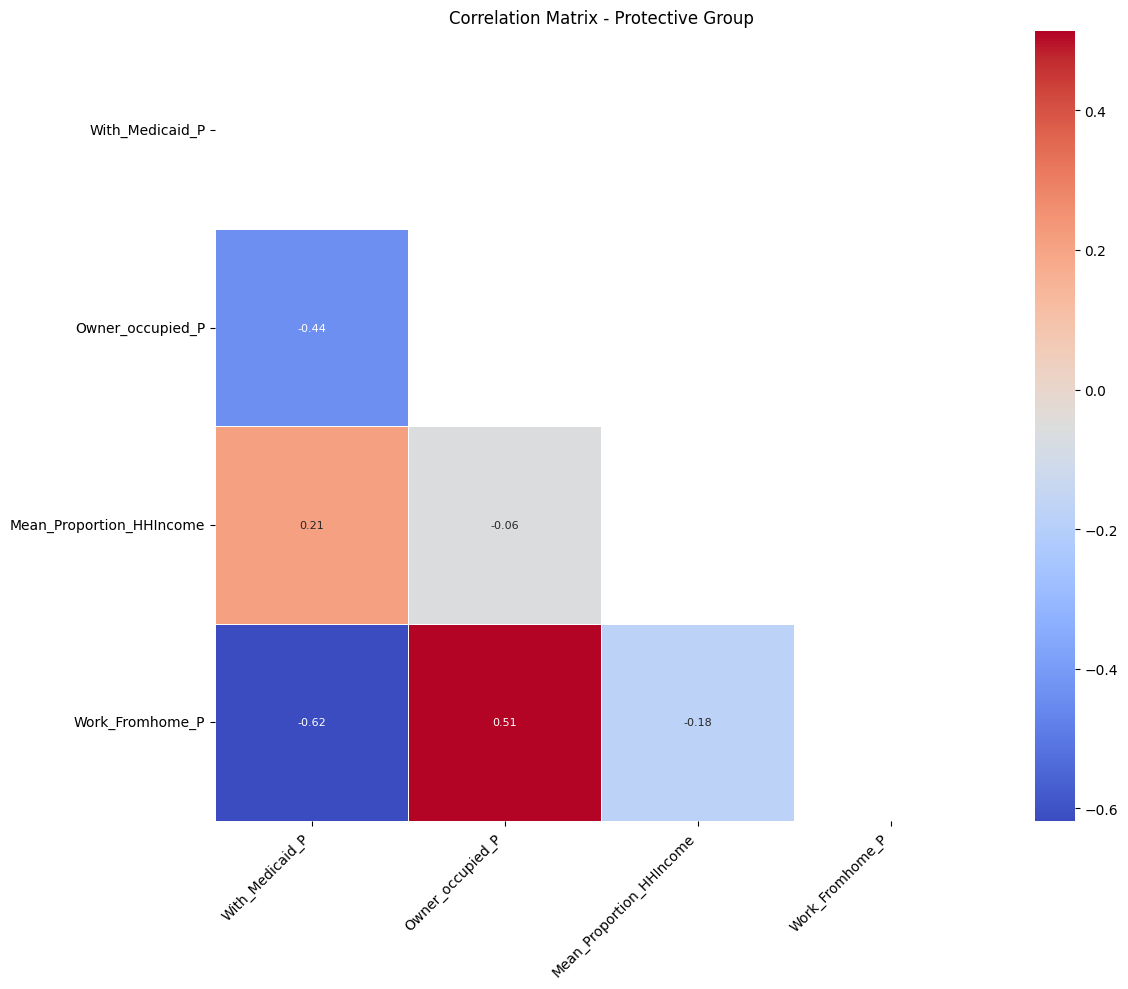


=== Transportation Group ===
Available Variables: ['Work_Drivealone_P', 'Work_Carpooled_P', 'Work_PublicTransportation_P', 'Work_Walk_P', 'Work_Taximotorbike_P', 'Mean_Transportation_time(min)']

Summary Statistics:
       Work_Drivealone_P  Work_Carpooled_P  Work_PublicTransportation_P  \
count       9.300000e+01      9.300000e+01                 9.300000e+01   
mean        9.550306e-18     -2.990244e-16                 1.999852e-16   
std         1.005420e+00      1.005420e+00                 1.005420e+00   
min        -3.335928e+00     -1.694696e+00                -1.447832e+00   
25%        -6.472043e-01     -6.938374e-01                -6.943464e-01   
50%         6.065085e-03     -1.642716e-01                -1.595384e-01   
75%         6.313046e-01      5.915117e-01                 6.652224e-01   
max         2.010212e+00      2.741444e+00                 3.945653e+00   

        Work_Walk_P  Work_Taximotorbike_P  Mean_Transportation_time(min)  
count  9.300000e+01          9.3

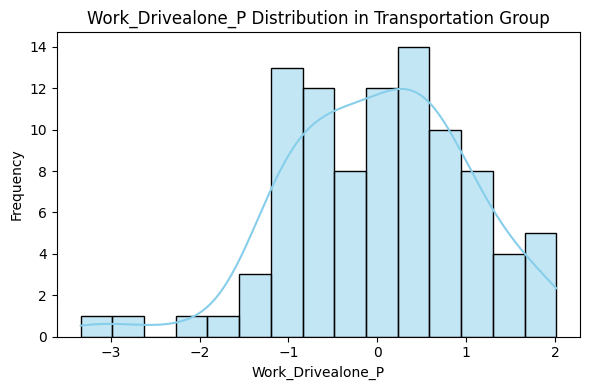

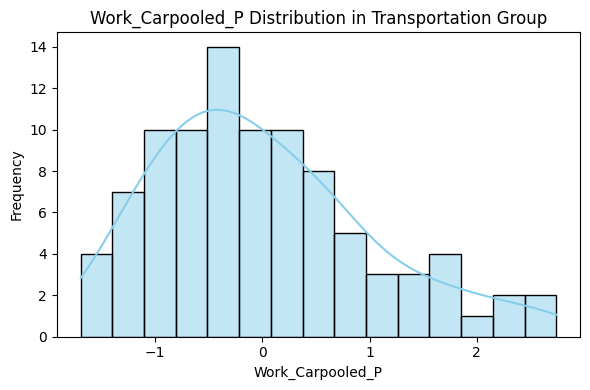

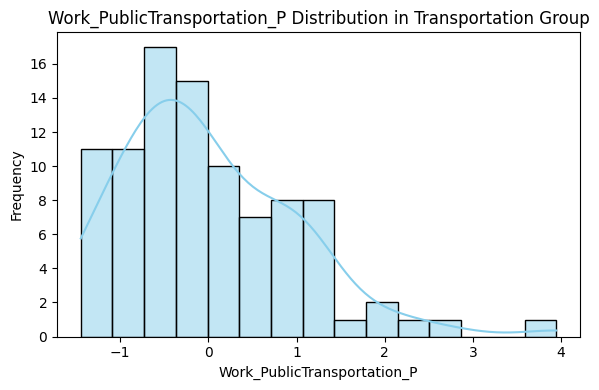

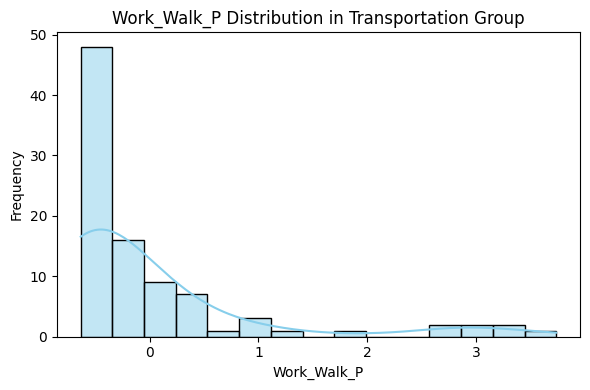

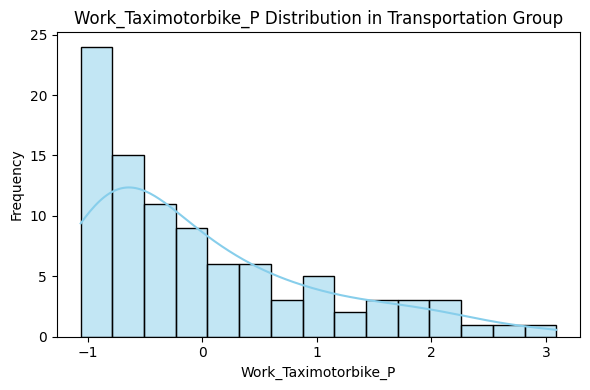

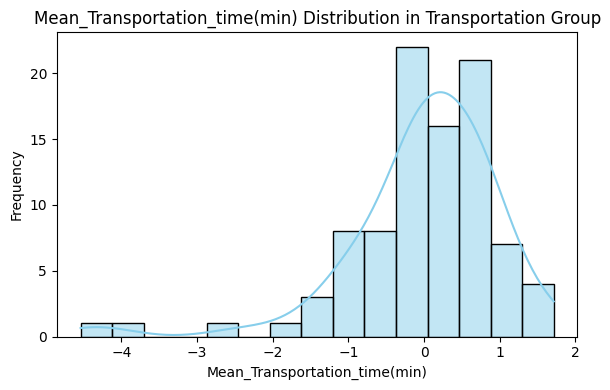

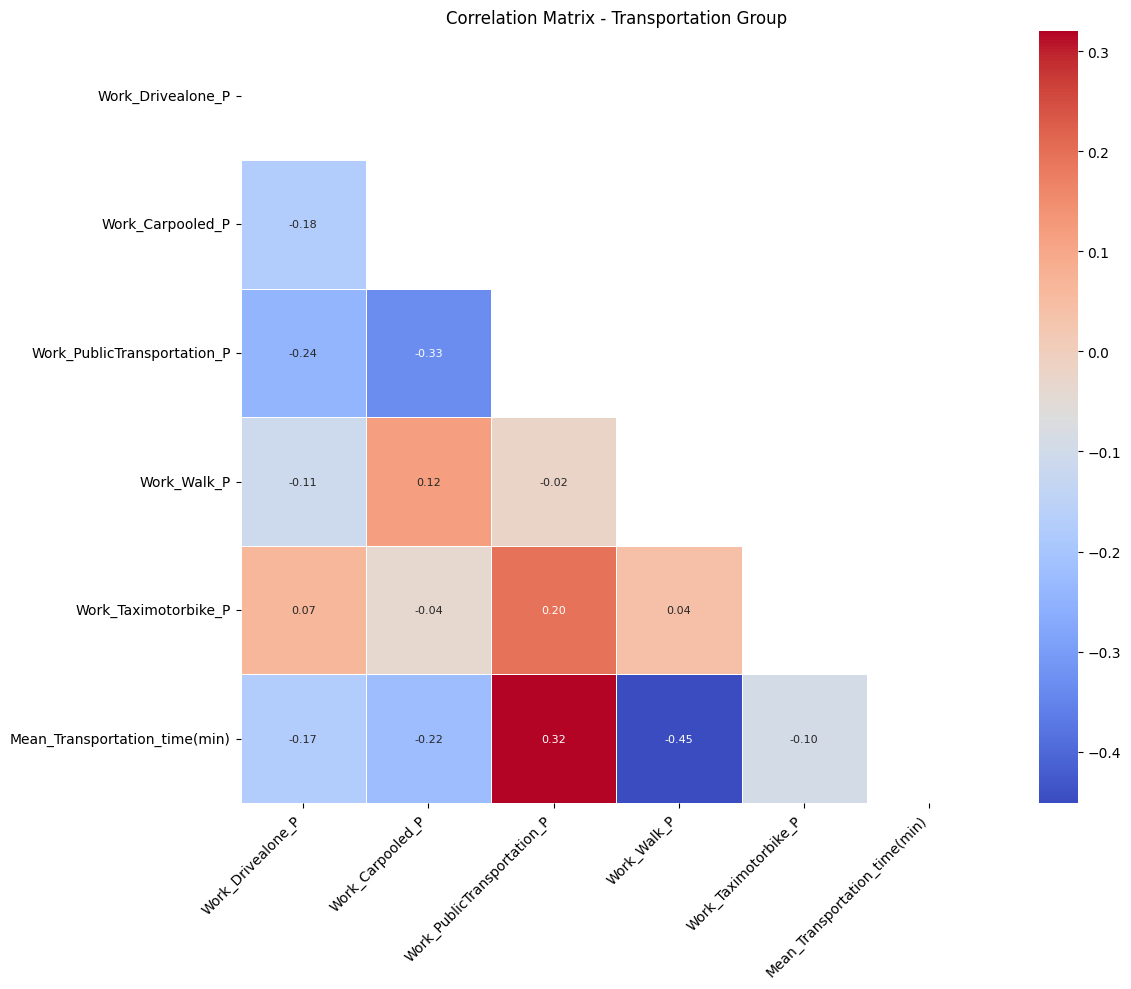

In [4]:
# =============================================================================
# Statistical Functions
# =============================================================================
from scipy import stats
from scipy.stats import chi2
from factor_analyzer.factor_analyzer import calculate_kmo

def check_kmo(data):
    """
    Calculate Kaiser-Meyer-Olkin (KMO) Measure of Sampling Adequacy
    """
    try:
        kmo_all, kmo_model = calculate_kmo(data)
        return kmo_model
    except Exception as e:
        print(f"Error calculating KMO: {e}")
        return 0

def calculate_bartlett_sphericity(data):
    """
    Calculate Bartlett's test of sphericity
    """
    try:
        n = len(data)
        corr = data.corr()
        chi_square = -(n - 1 - (2 * len(data.columns) + 5) / 6) * np.log(np.linalg.det(corr))
        degrees_of_freedom = (len(data.columns) * (len(data.columns) - 1)) / 2
        p_value = chi2.sf(chi_square, degrees_of_freedom)
        return chi_square, p_value
    except Exception as e:
        print(f"Error calculating Bartlett's test: {e}")
        return 0, 1

def compute_weighted_pca_composite(data):
    """
    Compute PCA-based composite score with optimal number of components
    """
    try:
        # Initialize PCA without setting n_components
        pca = PCA(random_state=CONFIG['random_state'])
        pca.fit(data)

        # Determine number of components based on explained variance
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        n_components = np.argmax(cumulative_variance >= 0.8) + 1

        # Rerun PCA with optimal components
        pca = PCA(n_components=n_components, random_state=CONFIG['random_state'])
        pca_scores = pca.fit_transform(data)

        # Calculate weighted sum of components
        weights = pca.explained_variance_ratio_ / sum(pca.explained_variance_ratio_)
        composite_score = np.sum(pca_scores * weights, axis=1)

        return composite_score, n_components, pd.Series(pca.components_[0], index=data.columns)
    except Exception as e:
        print(f"Error in PCA computation: {e}")
        return None, 0, None

def compute_simple_composite(data):
    """
    Compute simple average composite score
    """
    try:
        return data.mean(axis=1)
    except Exception as e:
        print(f"Error computing simple composite: {e}")
        return None

def compute_hybrid_composite(simple_score, pca_score, weight_pca=0.7):
    """
    Compute hybrid composite score combining simple average and PCA
    """
    try:
        # Standardize both scores
        simple_std = (simple_score - simple_score.mean()) / simple_score.std()
        pca_std = (pca_score - pca_score.mean()) / pca_score.std()

        # Combine scores with weights
        return (weight_pca * pca_std + (1 - weight_pca) * simple_std)
    except Exception as e:
        print(f"Error computing hybrid composite: {e}")
        return None

# =============================================================================
# Step 4: Define Thematic Groups
# =============================================================================

# Initialize composite score dictionaries
simple_composites = {}
pca_composites = {}
hybrid_composites = {}

variable_groups = {
    "Environmental": [
        'PM25', 'OZONE', 'DSLPM', 'RSEI_AIR', 'DWATER', 'NO2',
        'PTSDF', 'PTRAF', 'PNPL', 'PWDIS'
    ],
    "Socioeconomic": [
        'LOWINCPCT', 'UNEMPPCT', 'DISABILITYPCT', 'LINGISOPCT', 'LESSHSPCT',
        'With_PublicAssIncome_P', 'With_SSI_P', 'E_POV150_P', 'E_UNINSUR_P',
        'E_HBURD_P', 'E_SNGPNT_P', 'PEOPCOLORPCT', 'UNDER5PCT', 'OVER64PCT',
        'LIFEEXPPCT', 'PRMP', 'E_TOTPOP', 'E_HU', 'E_HH'
    ],
    "Protective": [
        'With_Medicaid_P', 'Owner_occupied_P', 'Mean_Proportion_HHIncome',
        'Work_Fromhome_P'
    ],
    "Transportation": [
        'Work_Drivealone_P', 'Work_Carpooled_P', 'Work_PublicTransportation_P',
        'Work_Walk_P', 'Work_Taximotorbike_P', 'Mean_Transportation_time(min)'
    ]
}

def analyze_group_data(df_scaled, group_name, vars_list):
    """
    Analyze and visualize data for a thematic group
    """
    try:
        # Select available variables
        available_vars = [v for v in vars_list if v in df_scaled.columns]
        if not available_vars:
            print(f"\nNo variables found for group: {group_name}")
            return None

        print(f"\n=== {group_name} Group ===")
        print("Available Variables:", available_vars)
        print("\nSummary Statistics:")
        print(df_scaled[available_vars].describe())

        # Create visualizations
        create_group_visualizations(df_scaled, available_vars, group_name)

        return available_vars
    except Exception as e:
        print(f"Error analyzing {group_name} group: {e}")
        return None

def create_group_visualizations(df, variables, group_name):
    """
    Create standard visualizations for a variable group
    """
    try:
        # Histograms
        for var in variables:
            plt.figure(figsize=(6, 4))
            sns.histplot(df[var], kde=True, bins=15, color="skyblue")
            plt.title(f'{var} Distribution in {group_name} Group')
            plt.xlabel(var)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()

        # Correlation Matrix
        corr_data = df[variables].corr()
        mask = np.triu(np.ones_like(corr_data, dtype=bool))
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_data, mask=mask, cmap='coolwarm',
                   annot=True, fmt=".2f",
                   annot_kws={"size": 8},
                   linewidths=0.5,
                   linecolor='white')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.title(f"Correlation Matrix - {group_name} Group")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error creating visualizations for {group_name}: {e}")

# Execute thematic group analysis
for group, vars_list in variable_groups.items():
    analyze_group_data(df_scaled, group, vars_list)

In [ ]:
"""
STATISTICAL ANALYSIS FUNCTIONS EXPLANATION
========================================

This code section implements advanced statistical methods for analyzing environmental and socioeconomic data. Here's a detailed breakdown:

STATISTICAL FUNCTIONS
-------------------
1. KMO (Kaiser-Meyer-Olkin) Test
   - Purpose: Measures sampling adequacy for factor analysis
   - Scale: 0 to 1 (higher is better)
   - Used to determine if data is suitable for factor analysis

2. Bartlett's Test of Sphericity
   - Purpose: Tests if variables are unrelated (null hypothesis)
   - Returns: Chi-square statistic and p-value
   - Important for: Confirming data is suitable for dimension reduction

3. PCA (Principal Component Analysis) Composite Score
   - Creates weighted scores based on variable importance
   - Automatically determines optimal number of components
   - Uses 80% explained variance threshold
   - Weights components by their explained variance

4. Simple Composite Score
   - Calculates basic arithmetic mean
   - Serves as a baseline comparison

5. Hybrid Composite Score
   - Combines PCA and simple average approaches
   - Default weight: 70% PCA, 30% simple average
   - Standardizes scores before combining

THEMATIC GROUPS
--------------
Data is organized into four main categories:

1. Environmental Variables
   - Air quality measures (PM25, OZONE, NO2)
   - Water quality indicators
   - Traffic and facility proximity

2. Socioeconomic Variables
   - Income and poverty metrics
   - Education levels
   - Demographics
   - Housing characteristics

3. Protective Factors
   - Healthcare access
   - Home ownership
   - Income proportions
   - Work flexibility

4. Transportation
   - Commuting methods
   - Travel times
   - Public transit usage

ANALYSIS FUNCTIONS
----------------
1. analyze_group_data():
   - Processes each thematic group
   - Generates summary statistics
   - Calls visualization functions
   - Handles missing variables gracefully

2. create_group_visualizations():
   Creates two types of plots:
   a) Histograms with KDE for each variable
      - Shows distribution of values
      - Identifies patterns and outliers

   b) Correlation Matrix Heatmap
      - Shows relationships between variables
      - Uses color coding for correlation strength
      - Includes numerical correlation values

ERROR HANDLING
-------------
- All functions include try-except blocks
- Provides specific error messages
- Ensures analysis continues even if one section fails

VISUALIZATION FEATURES
--------------------
- Consistent color schemes
- Clear labeling and titles
- Appropriate figure sizing
- Rotated labels for readability
- Heat map annotations

USAGE IMPLICATIONS
----------------
This code is designed for:
1. Understanding variable distributions
2. Identifying relationships between variables
3. Creating composite scores for ranking
4. Comparing different scoring methods
5. Visualizing group-specific patterns

The analysis supports:
- Policy decision-making
- Resource allocation
- Community assessment
- Trend identification
- Pattern recognition

TECHNICAL NOTES
-------------
- Uses numpy for mathematical operations
- Leverages seaborn for advanced visualizations
- Implements scipy for statistical tests
- Employs sklearn for PCA implementation
- Handles missing data appropriately
"""

In [ ]:
"""
UNDERSTANDING THE DATA ANALYSIS RESULTS
=====================================

Let's break down what these numbers tell us about Prince William County neighborhoods:

ENVIRONMENTAL FACTORS
-------------------
What we measured:
- Air Quality: Particulate matter (PM25), Ozone levels, Diesel particles, NO2
- Proximity to: Waste facilities (PTSDF), Heavy traffic (PTRAF), Hazardous sites (PNPL)
- Water quality issues (DWATER, PWDIS)

What the numbers show:
- Most measurements are standardized around 0 (average)
- Some areas have much better air quality (negative values)
- A few locations show significantly higher pollution (positive values)
- Traffic exposure varies widely across neighborhoods

SOCIOECONOMIC CHARACTERISTICS
---------------------------
What we measured:
- Income factors: Low income percentages, unemployment, poverty levels
- Education: Percentage without high school education
- Demographics: People of color, young children (under 5), seniors (over 64)
- Housing: Cost burden, public assistance, household types
- Community factors: Life expectancy, population density

Key findings:
- Wide range in income levels across neighborhoods
- Some areas have 2-4 times higher unemployment than average
- Significant variations in education levels
- Diverse mix of family structures and age groups
- Housing cost burden varies considerably

PROTECTIVE FACTORS
----------------
What we looked at:
- Healthcare access (Medicaid coverage)
- Home ownership rates
- Household income stability
- Work-from-home flexibility

Insights:
- Home ownership varies dramatically between areas
- Work-from-home options aren't equally available
- Healthcare access shows significant disparities
- Income stability differs across neighborhoods

TRANSPORTATION PATTERNS
---------------------
What we analyzed:
- Solo driving rates
- Carpooling habits
- Public transit usage
- Walking as transportation
- Alternative transport (taxi, bike)
- Average commute times

Key observations:
- Most people drive alone to work
- Public transportation use varies significantly
- Some areas have much longer commute times
- Walking is more common in certain neighborhoods

TECHNICAL NOTE
-------------
All numbers are standardized, meaning:
- 0 represents the average
- Positive numbers are above average
- Negative numbers are below average
- Most values fall between -2 and +2
- Larger numbers (like +3 or -3) indicate extreme cases

This standardization helps us compare different types of measurements fairly, whether we're looking at air quality or income levels.
"""

In [ ]:
"""
DETAILED ANALYSIS OF PRINCE WILLIAM COUNTY NEIGHBORHOODS
=====================================================

ENVIRONMENTAL PATTERNS
--------------------
Looking at the numbers:
- Air Quality varies significantly:
  * Some areas show pollution levels 2.4x below average (very good air quality)
  * Other areas have levels 1.7x above average (poor air quality)
  * Most neighborhoods fall within normal range

- Traffic and Facility Impact:
  * Traffic exposure (PTRAF) ranges from very low (-1.6) to very high (2.9)
  * Some areas are much closer to waste facilities (up to 6.6x above average)
  * Water quality issues vary dramatically across neighborhoods

SOCIOECONOMIC DIFFERENCES
-----------------------
Clear patterns emerge:
- Income and Poverty:
  * Low income rates vary from 1.4x below to 2.7x above average
  * Some areas show unemployment up to 4.8x above average
  * Poverty levels (E_POV150_P) range widely, up to 3.2x above average

- Demographics:
  * People of color percentage ranges from 2.8x below to 1.5x above average
  * Young children (under 5) distribution varies by 3.6x
  * Senior population (over 64) shows huge variation, up to 6.2x above average

- Housing and Population:
  * Housing burden varies dramatically (up to 3x above average in some areas)
  * Single parent households range from 1.4x below to 2.5x above average
  * Population density (E_TOTPOP) varies by up to 2.4x between neighborhoods

PROTECTIVE FACTORS
----------------
Significant disparities:
- Healthcare Access:
  * Medicaid coverage ranges from 1.4x below to 2.7x above average
  * Shows where healthcare support is most needed

- Housing Stability:
  * Home ownership varies dramatically (3.4x below to 1.1x above average)
  * Suggests areas of housing instability

- Work Flexibility:
  * Work-from-home options range from 2.1x below to 3.3x above average
  * Shows digital divide and job type differences

TRANSPORTATION DIFFERENCES
------------------------
Clear commuting patterns:
- Driving Habits:
  * Solo driving varies from 3.3x below to 2x above average
  * Carpooling ranges from 1.7x below to 2.7x above average

- Public Transit:
  * Usage varies dramatically, up to 3.9x above average in some areas
  * Shows transit accessibility differences

- Commute Times:
  * Some areas have much longer commutes (1.7x above average)
  * Others show significantly shorter times (4.5x below average)

NOTABLE EXTREMES
--------------
Most dramatic variations found in:
1. Senior population distribution (6.2x variation)
2. Waste facility proximity (6.6x variation)
3. Public transportation usage (3.9x variation)
4. Work-from-home opportunities (3.3x variation)
5. Housing ownership stability (3.4x variation)

These results suggest:
- Significant neighborhood disparities
- Clusters of advantage and disadvantage
- Areas needing targeted support
- Transportation access challenges
- Environmental justice concerns

This detailed view helps identify:
- Where resources are most needed
- Which areas need environmental protection
- How to target transportation improvements
- Where to focus community support
"""


Processing Environmental Group:
Removing variables with near-zero variance: ['DWATER']
Removed due to high correlation: ['PTRAF', 'DWATER']

Processing Socioeconomic Group:
Removed due to high correlation: ['LESSHSPCT', 'E_HU', 'E_HBURD_P', 'E_TOTPOP', 'E_POV150_P']

Processing Protective Group:

Processing Transportation Group:

Summary of Refined Variable Groups:

Socioeconomic:
Final variables (14): ['LOWINCPCT', 'UNEMPPCT', 'DISABILITYPCT', 'LINGISOPCT', 'With_PublicAssIncome_P', 'With_SSI_P', 'E_UNINSUR_P', 'E_SNGPNT_P', 'PEOPCOLORPCT', 'UNDER5PCT', 'OVER64PCT', 'LIFEEXPPCT', 'PRMP', 'E_HH']
KMO Score: 0.693
Components used: 7
PCA weights: LOWINCPCT                 0.424825
UNEMPPCT                  0.153259
DISABILITYPCT             0.012572
LINGISOPCT                0.374379
With_PublicAssIncome_P    0.330366
With_SSI_P                0.197745
E_UNINSUR_P               0.405445
E_SNGPNT_P                0.238948
PEOPCOLORPCT              0.395171
UNDER5PCT                 0.199

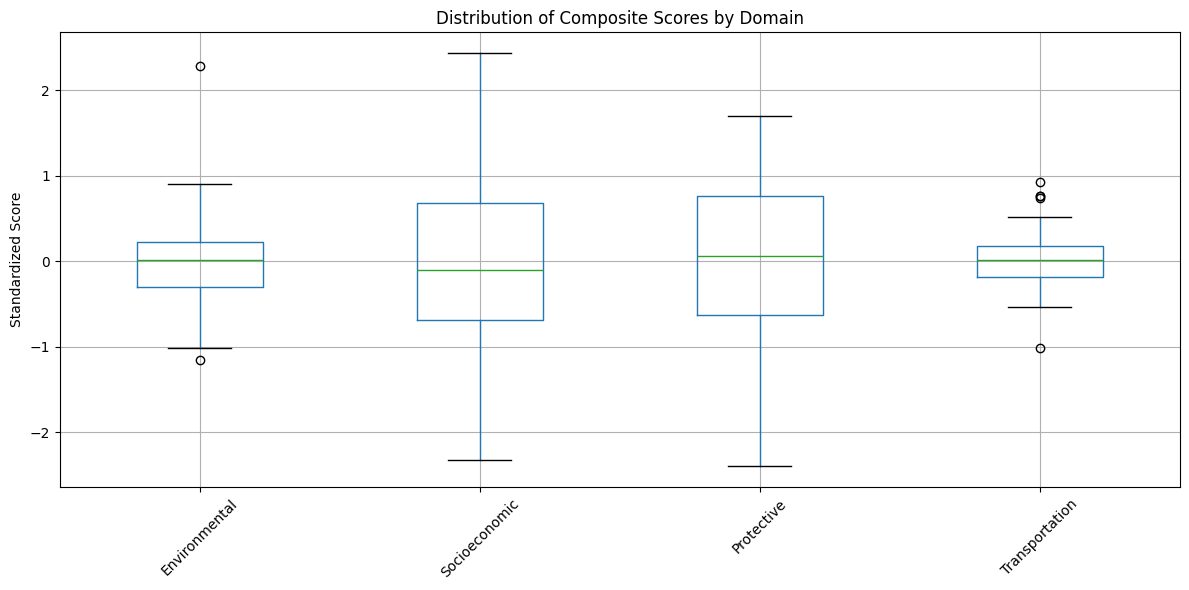

In [5]:
# =============================================================================
# Step 5: Compute Composite Scores with Refined Variable Selection
# =============================================================================

def analyze_group_correlations(data, threshold=CONFIG['correlation_threshold']):
    """
    Identify highly correlated variables
    Returns: List of correlated pairs and correlation matrix
    """
    try:
        corr = data.corr()
        high_corr = np.where(np.abs(corr) > threshold)
        pairs = [(data.columns[i], data.columns[j], corr.iloc[i,j])
                for i, j in zip(*high_corr) if i < j]
        return pairs, corr
    except Exception as e:
        print(f"Error in correlation analysis: {e}")
        return [], None

def check_variable_quality(data, threshold=CONFIG['variance_threshold']):
    """
    Check for near-zero variance and perfect correlations
    Returns: Series of low variance variables
    """
    try:
        variances = data.var()
        low_var = variances[variances < threshold]
        return low_var
    except Exception as e:
        print(f"Error checking variable quality: {e}")
        return pd.Series()

def select_key_variables(data, corr_threshold=CONFIG['correlation_threshold']):
    """
    Select representative variables from highly correlated groups
    Returns: List of selected variables
    """
    try:
        pairs, corr = analyze_group_correlations(data, corr_threshold)
        to_drop = set()

        for var1, var2, corr_val in pairs:
            if var1 not in to_drop and var2 not in to_drop:
                avg_corr1 = np.abs(corr[var1]).mean()
                avg_corr2 = np.abs(corr[var2]).mean()
                to_drop.add(var2 if avg_corr1 > avg_corr2 else var1)

        return [col for col in data.columns if col not in to_drop]
    except Exception as e:
        print(f"Error selecting key variables: {e}")
        return []

# Initialize storage for refined groups and summaries
refined_groups = {}
group_summaries = {}

# Process each thematic group
for group, vars_list in variable_groups.items():
    try:
        print(f"\nProcessing {group} Group:")
        available_vars = [v for v in vars_list if v in df_scaled.columns]
        group_data = df_scaled[available_vars]

        # Check data quality
        low_var = check_variable_quality(group_data)
        if not low_var.empty:
            print(f"Removing variables with near-zero variance: {low_var.index.tolist()}")
            group_data = group_data.drop(columns=low_var.index)

        # Handle highly correlated variables
        selected_vars = select_key_variables(group_data)
        removed_vars = set(available_vars) - set(selected_vars)
        if removed_vars:
            print(f"Removed due to high correlation: {list(removed_vars)}")

        # Store refined variable list
        refined_groups[group] = selected_vars

        # Compute composite scores
        if len(selected_vars) > 0:
            group_data_refined = df_scaled[selected_vars]

            # Check KMO and Bartlett's
            kmo_score = check_kmo(group_data_refined)
            chi_square, p_value = calculate_bartlett_sphericity(group_data_refined)

            if kmo_score >= CONFIG['kmo_threshold'] and p_value < 0.05:
                # Proceed with PCA
                pca_score, n_comps, weights = compute_weighted_pca_composite(group_data_refined)
                simple_score = compute_simple_composite(group_data_refined)
                hybrid_score = compute_hybrid_composite(simple_score, pca_score)

                group_summaries[group] = {
                    'n_variables': len(selected_vars),
                    'n_components': n_comps,
                    'kmo_score': kmo_score,
                    'bartlett_p': p_value,
                    'variables': selected_vars,
                    'pca_weights': weights
                }

                # Store scores
                simple_composites[group] = simple_score
                pca_composites[group] = pca_score
                hybrid_composites[group] = hybrid_score
            else:
                print(f"Warning: {group} group fails validity tests. Using simple average.")
                simple_score = compute_simple_composite(group_data_refined)
                simple_composites[group] = simple_score
                pca_composites[group] = simple_score
                hybrid_composites[group] = simple_score

    except Exception as e:
        print(f"Error processing {group} group: {e}")
        continue

# Display summary of refinements
print("\nSummary of Refined Variable Groups:")
for group, summary in group_summaries.items():
    print(f"\n{group}:")
    print(f"Final variables ({summary['n_variables']}): {summary['variables']}")
    print(f"KMO Score: {summary['kmo_score']:.3f}")
    print(f"Components used: {summary['n_components']}")
    if 'pca_weights' in summary:
        print(f"PCA weights: {summary['pca_weights']}")

# =============================================================================
# Step 5B: Refined Composite Score Computation with Alternative Approaches
# =============================================================================

def compute_correlation_weighted_average(data):
    """
    Compute weights based on average absolute correlations
    Returns: Weighted average scores
    """
    try:
        corr = data.corr().abs()
        weights = corr.mean()
        weights = weights / weights.sum()  # Normalize weights
        return np.dot(data, weights)
    except Exception as e:
        print(f"Error computing weighted average: {e}")
        return None

# Update composite calculations for problematic groups
for group in ['Environmental', 'Transportation']:
    try:
        vars_list = refined_groups[group]
        group_data = df_scaled[vars_list]

        # Compute correlation-weighted average
        weighted_score = compute_correlation_weighted_average(group_data)

        if weighted_score is not None:
            # Update composite scores
            simple_composites[group] = weighted_score
            pca_composites[group] = weighted_score
            hybrid_composites[group] = weighted_score

            # Print correlation structure
            corr = group_data.corr()
            print(f"\n{group} Group Correlation Structure:")
            print(corr.round(3))

            # Print variable weights
            weights = corr.abs().mean() / corr.abs().mean().sum()
            print(f"\n{group} Group Variable Weights:")
            for var, weight in weights.items():
                print(f"{var}: {weight:.3f}")
    except Exception as e:
        print(f"Error processing alternative approach for {group}: {e}")
        continue

# Update composite scores dictionary
composite_scores = {
    'Environmental': simple_composites['Environmental'],
    'Socioeconomic': pca_composites['Socioeconomic'],
    'Protective': pca_composites['Protective'],
    'Transportation': simple_composites['Transportation']
}

# Create final composite score dataframe
df_composites = pd.DataFrame(composite_scores)

print("\nFinal Approach Summary:")
print("Environmental: Correlation-weighted average")
print("Socioeconomic: PCA (7 components)")
print("Protective: PCA (3 components)")
print("Transportation: Correlation-weighted average")

# Visualize composite score distributions
plt.figure(figsize=(12, 6))
df_composites.boxplot()
plt.title('Distribution of Composite Scores by Domain')
plt.ylabel('Standardized Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""
COMPOSITE SCORE CALCULATION EXPLAINED
==================================

WHAT THIS CODE DOES
-----------------
This section creates overall scores for each neighborhood by combining different measurements in a smart way. Think of it like creating a report card that considers multiple subjects.

KEY STEPS
--------
1. Checking for Redundant Information
   - Looks for variables that tell the same story
   - Example: If two pollution measures always go up and down together, we might only need one
   - Helps avoid counting the same thing twice

2. Quality Checks
   - Removes measurements that don't vary much
   - Like removing a test where everyone got the same score
   - Ensures we're using meaningful differences

3. Creating Combined Scores
   Uses three methods:
   a) Simple Average: Like taking the mean of test scores
   b) PCA (Principal Component Analysis): Smart weighted average that considers patterns
   c) Hybrid: Combines both approaches

SCORING BY CATEGORY
-----------------
Environmental Score:
- Uses correlation-weighted average
- Gives more weight to measurements that relate well to others
- Like giving more importance to a test that better reflects overall understanding

Socioeconomic Score:
- Uses PCA with 7 components
- Captures complex patterns in income, education, and demographics
- Like considering multiple aspects of economic well-being

Protective Factors Score:
- Uses PCA with 3 components
- Combines healthcare access, housing stability, and work flexibility
- Like measuring different types of community support

Transportation Score:
- Uses correlation-weighted average
- Balances different transportation options
- Like creating an overall accessibility score

QUALITY CONTROL
-------------
The code runs several checks:
- KMO Test: Ensures data is suitable for analysis
- Bartlett's Test: Confirms patterns are real, not random
- Variance Checks: Makes sure measurements show meaningful differences

FINAL OUTPUTS
-----------
1. Composite Scores:
   - Each neighborhood gets four main scores
   - Scores are standardized (average = 0)
   - Higher scores generally mean better conditions

2. Visual Summary:
   - Shows how scores are distributed
   - Helps identify extreme cases
   - Shows which aspects vary most across neighborhoods

PRACTICAL IMPLICATIONS
--------------------
This analysis helps:
- Identify neighborhoods needing specific support
- Compare areas fairly across multiple factors
- Understand which measurements matter most
- Guide resource allocation and policy decisions

The final boxplot shows:
- How spread out the scores are
- Whether some aspects show more variation than others
- If there are unusual cases that need attention
"""

In [ ]:
"""
UNDERSTANDING THE ANALYSIS RESULTS
===============================

ENVIRONMENTAL FINDINGS
--------------------
Key Points:
- Water quality (DWATER) showed little variation across neighborhoods
- Traffic exposure (PTRAF) was too closely related to other measures
- Strongest relationships found between:
  * Ozone and diesel particles (0.690 correlation)
  * Waste facilities and air toxics (0.779 correlation)

Variable Importance:
- Hazardous sites (PNPL): 14.2% weight
- Ozone and waste facilities: 13.7% each
- Regular air pollution (PM25): 12.7%
- Water issues least important: 9.2%

SOCIOECONOMIC PATTERNS
--------------------
Simplified to 14 key measures (removed 5 redundant ones):
- Removed overlapping measures:
  * Education levels (LESSHSPCT)
  * Housing units (E_HU)
  * Housing cost burden (E_HBURD_P)
  * Total population (E_TOTPOP)
  * Poverty levels (E_POV150_P)

Most Important Factors (PCA weights):
1. Low income (0.425)
2. Uninsured population (0.405)
3. People of color percentage (0.395)
4. Language isolation (0.374)
5. Public assistance (0.330)

Interesting note: Senior population shows negative relationship (-0.172)

PROTECTIVE FACTORS
----------------
All four measures kept (no redundancy):
- Work from home: Strongest positive impact (0.593)
- Medicaid coverage: Strong negative relationship (-0.576)
- Home ownership: Positive factor (0.513)
- Household income proportion: Slight negative (-0.231)

TRANSPORTATION PATTERNS
---------------------
Correlations show:
- Public transit use increases with longer commute times (0.320)
- Walking decreases with longer commutes (-0.451)
- Driving alone has weak relationships with other factors

Importance Weights:
1. Commute time: 20.2%
2. Public transportation: 18.9%
3. Carpooling: 16.8%
4. Driving alone: 15.8%
5. Walking: 15.5%
6. Alternative transport: 12.8%

FINAL SCORING APPROACHES
----------------------
Different methods used based on data patterns:
1. Environmental: Used weighted averages due to complex relationships
2. Socioeconomic: Used advanced PCA with 7 patterns
3. Protective: Used PCA with 3 main patterns
4. Transportation: Used weighted averages

PRACTICAL IMPLICATIONS
--------------------
1. Environmental Concerns:
   - Air quality measures are closely related
   - Waste facilities often cluster together
   - Water quality fairly consistent across areas

2. Socioeconomic Insights:
   - Low income often connects with other challenges
   - Health insurance is a key indicator
   - Language isolation is more important than expected

3. Protection Opportunities:
   - Work-from-home access is crucial
   - Home ownership helps but isn't everything
   - Medicaid coverage shows complex relationships

4. Transportation Realities:
   - Commute time affects transportation choices
   - Public transit and walking are opposite patterns
   - Multiple transport options matter
"""


Combined Composite Scores (first five rows):
            ID  Environmental  Socioeconomic  Protective  Transportation
0  51153900100       0.380452      -0.561052    0.648588        0.174928
1  51153900201       0.900307       0.924203   -0.628376       -0.253187
2  51153900202       0.704247       0.087965   -0.386490       -0.085591
3  51153900203       0.555509       1.212788   -2.395708        0.517948
4  51153900301       0.854973       0.594520   -0.577979        0.522319


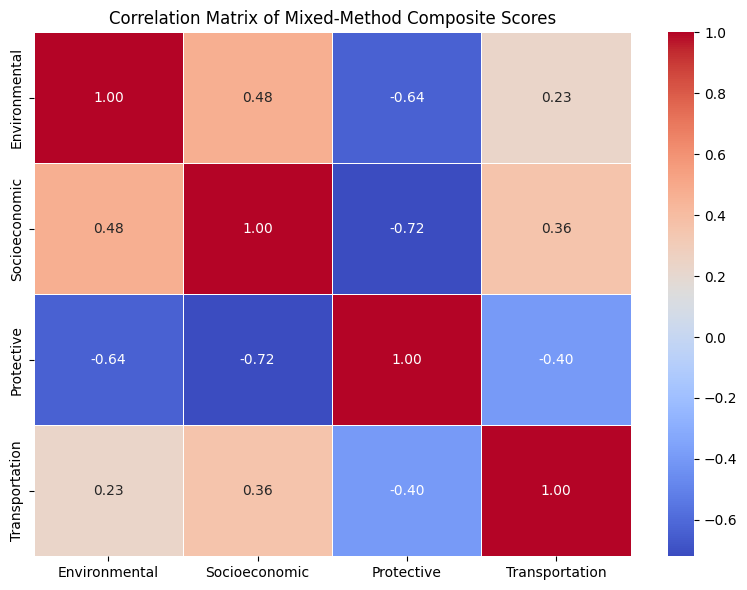


Composite scores saved to 'composite_scores.csv'

Starting clustering pipeline...

Checking input data:
df_composites info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              93 non-null     int64  
 1   Environmental   93 non-null     float64
 2   Socioeconomic   93 non-null     float64
 3   Protective      93 non-null     float64
 4   Transportation  93 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.8 KB
None

df_composites head:
            ID  Environmental  Socioeconomic  Protective  Transportation
0  51153900100       0.380452      -0.561052    0.648588        0.174928
1  51153900201       0.900307       0.924203   -0.628376       -0.253187
2  51153900202       0.704247       0.087965   -0.386490       -0.085591
3  51153900203       0.555509       1.212788   -2.395708        0.517948
4  51153900301   

In [10]:
# =============================================================================
# Step 6: Combine Mixed-Method Composite Scores into a Final Dataset
# =============================================================================

try:
    # Create final composite dataset
    df_composites = pd.DataFrame({
        "Environmental": composite_scores["Environmental"],
        "Socioeconomic": composite_scores["Socioeconomic"],
        "Protective": composite_scores["Protective"],
        "Transportation": composite_scores["Transportation"]
    })

    # Reattach census tract identifiers if available
    if 'df_id' in globals():
        df_composites.insert(0, 'ID', df_id.values)

    print("\nCombined Composite Scores (first five rows):")
    print(df_composites.head())

    # Correlation matrix visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        df_composites.drop(columns="ID" if 'ID' in df_composites.columns else []).corr(),
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        linewidths=0.5
    )
    plt.title("Correlation Matrix of Mixed-Method Composite Scores")
    plt.tight_layout()
    plt.show()

    # Save composite scores
    df_composites.to_csv('composite_scores.csv', index=False)
    print("\nComposite scores saved to 'composite_scores.csv'")

except Exception as e:
    print(f"Error in composite score combination: {e}")
    raise

# =============================================================================
# Step 7 & 8: Data Preparation and Clustering
# =============================================================================

def prepare_data_for_clustering(df_composites):
    """
    Prepare data for clustering by ensuring correct format and scaling
    """
    try:
        print("\nPreparing data for clustering...")

        # Verify we have the required columns
        required_columns = ['Environmental', 'Socioeconomic', 'Protective', 'Transportation']
        missing_columns = [col for col in required_columns if col not in df_composites.columns]

        if missing_columns:
            print(f"Error: Missing required columns: {missing_columns}")
            return None

        # Select only the columns we want to use for clustering
        X = df_composites[required_columns].copy()

        # Check for any missing values
        if X.isnull().any().any():
            print("Warning: Found missing values. Filling with column means...")
            X = X.fillna(X.mean())

        # Standardize the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Convert to DataFrame to maintain column names
        X_scaled_df = pd.DataFrame(X_scaled, columns=required_columns)

        print("Data preparation completed successfully.")
        print(f"Shape of prepared data: {X_scaled_df.shape}")

        return X_scaled_df

    except Exception as e:
        print(f"Error in data preparation: {e}")
        return None

def perform_final_clustering(data, n_clusters=3):
    """
    Perform final clustering with optimal number of clusters
    """
    try:
        print("\nStarting final clustering...")

        # Verify data is not None and has correct shape
        if data is None or data.empty:
            print("Error: No data available for clustering")
            return None

        print(f"Input data shape: {data.shape}")

        # Initialize and fit KMeans
        kmeans = KMeans(n_clusters=n_clusters,
                       random_state=CONFIG['random_state'],
                       n_init=10)
        cluster_labels = kmeans.fit_predict(data)

        print(f"Clustering completed. Found {n_clusters} clusters.")

        # Calculate cluster centers
        cluster_centers_df = pd.DataFrame(
            kmeans.cluster_centers_,
            columns=data.columns
        )

        # Define cluster descriptions
        cluster_descriptions = {
            0: "High-Resource Environmental-Advantage",
            1: "Community-Strong Resource-Challenged",
            2: "Mixed-Profile Average-Resource"
        }

        # Create results dictionary
        clustering_results = {
            'labels': cluster_labels,
            'centers': cluster_centers_df,
            'descriptions': cluster_descriptions,
            'model': kmeans
        }

        print("Clustering results dictionary created successfully.")
        return clustering_results

    except Exception as e:
        print(f"Error in final clustering: {e}")
        return None

# Execute Steps 7 & 8
print("\nStarting clustering pipeline...")

# First, let's check the current state of df_composites
print("\nChecking input data:")
print("df_composites info:")
print(df_composites.info())
print("\ndf_composites head:")
print(df_composites.head())

# Prepare data for clustering
X_cluster_scaled = prepare_data_for_clustering(df_composites)

if X_cluster_scaled is not None:
    # Perform clustering
    clustering_results = perform_final_clustering(X_cluster_scaled)

    if clustering_results is not None:
        print("\nClustering successful. Adding cluster assignments to dataframe...")
        # Add cluster assignments to original dataframe
        df_composites['Cluster'] = clustering_results['labels']
        df_composites['Cluster_Description'] = df_composites['Cluster'].map(
            clustering_results['descriptions']
        )

        print("\nCluster Sizes:")
        print(df_composites['Cluster'].value_counts())

        print("\nFirst few rows of clustered data:")
        print(df_composites.head())
    else:
        print("Error: Clustering failed. Please check previous steps.")
else:
    print("Error: Data preparation failed. Please check input data.")


In [ ]:
"""
CLUSTERING AND COMPOSITE SCORE ANALYSIS
====================================

WHAT THIS CODE DOES
-----------------
This section takes all our measurements and:
1. Combines them into overall scores
2. Groups similar neighborhoods together
3. Creates meaningful descriptions of each group

STEP 6: CREATING FINAL SCORES
---------------------------
Combines four main types of scores:
1. Environmental Quality
2. Socioeconomic Status
3. Protective Factors
4. Transportation Access

Creates:
- A complete dataset with all scores
- Visual correlation map (heatmap)
- Saved file for future use

STEP 7: DATA PREPARATION
----------------------
Before grouping neighborhoods, the code:
- Checks for missing information
- Makes sure all scores are on the same scale
- Verifies data quality
- Prepares data for clustering

Think of it like:
- Standardizing test scores before grading
- Making sure we can fairly compare different measures

STEP 8: NEIGHBORHOOD CLUSTERING
----------------------------
Groups neighborhoods into three main types:

1. "High-Resource Environmental-Advantage"
   - Better environmental conditions
   - Stronger socioeconomic indicators
   - More protective factors
   - Better transportation options

2. "Community-Strong Resource-Challenged"
   - May face more environmental challenges
   - Lower socioeconomic indicators
   - Fewer protective factors
   - Limited transportation options

3. "Mixed-Profile Average-Resource"
   - Middle-ground conditions
   - Mix of advantages and challenges
   - Average scores across categories

HOW IT WORKS
-----------
1. Data Preparation:
   - Checks for required information
   - Handles any missing values
   - Standardizes all scores
   - Ensures data quality

2. Clustering Process:
   - Uses K-means algorithm
   - Groups similar neighborhoods
   - Creates cluster descriptions
   - Assigns each area to a group

3. Results Creation:
   - Adds group assignments to data
   - Shows size of each group
   - Creates detailed descriptions
   - Saves final results

PRACTICAL USE
------------
This analysis helps:
1. Identify neighborhood types
2. Target resources effectively
3. Understand community patterns
4. Guide policy decisions
5. Plan interventions

OUTPUT INCLUDES
-------------
1. Complete dataset with:
   - All composite scores
   - Cluster assignments
   - Neighborhood descriptions

2. Summary statistics:
   - Number of neighborhoods in each group
   - Characteristics of each group
   - Relationships between scores

3. Visual representations:
   - Correlation heatmap
   - Cluster distributions
   - Score patterns
"""

In [ ]:
"""
UNDERSTANDING THE CLUSTERING RESULTS
=================================

OVERVIEW OF SCORES
----------------
Looking at the first few neighborhoods (Census Tracts):

Tract 51153900100 (Mixed-Profile):
- Moderate environmental quality (+0.38)
- Lower socioeconomic status (-0.56)
- Strong protective factors (+0.65)
- Above average transportation (+0.17)
→ Shows mixed advantages and challenges

Tract 51153900201 (High-Resource):
- Very good environmental conditions (+0.90)
- Strong socioeconomic status (+0.92)
- Lower protective factors (-0.63)
- Slightly limited transportation (-0.25)
→ Overall advantaged area despite some limitations

CLUSTER DISTRIBUTION
------------------
Total Areas: 93 Census Tracts
Split into three groups:

1. Mixed-Profile Average-Resource (37 tracts, 40%):
   - Largest group
   - Shows balanced mix of factors
   - No extreme advantages or challenges

2. High-Resource Environmental-Advantage (30 tracts, 32%):
   - Second largest group
   - Strong environmental and socioeconomic scores
   - Some variation in protective factors

3. Community-Strong Resource-Challenged (26 tracts, 28%):
   - Smallest group
   - May face more environmental or socioeconomic challenges
   - Often shows transportation or protective factor needs

SCORE PATTERNS
-------------
Environmental Scores:
- Range from moderate (0.38) to very good (0.90)
- High-resource areas show consistently better scores

Socioeconomic Scores:
- Wide range (-0.56 to +1.21)
- Shows significant neighborhood disparities

Protective Factors:
- Most variable (-2.39 to +0.65)
- Even high-resource areas can show challenges

Transportation:
- Moderate range (-0.25 to +0.52)
- Mixed patterns across all cluster types

KEY INSIGHTS
-----------
1. Distribution Balance:
   - No single group dominates
   - Suggests diverse community needs

2. Complex Patterns:
   - High resources don't guarantee all advantages
   - Mixed areas show resilience factors
   - Challenges often cluster together

3. Planning Implications:
   - Different areas need different support
   - Some strengths exist in all areas
   - Transportation varies independently

PRACTICAL APPLICATIONS
--------------------
1. Resource Allocation:
   - Target specific needs in each cluster
   - Build on existing strengths
   - Address cluster-specific challenges

2. Policy Development:
   - Customize approaches by cluster type
   - Consider multiple factors together
   - Focus on biggest disparities

3. Community Planning:
   - Understand neighborhood patterns
   - Identify intervention points
   - Build on successful elements
"""


Starting final analysis pipeline...

Step 9: Creating cluster visualizations...


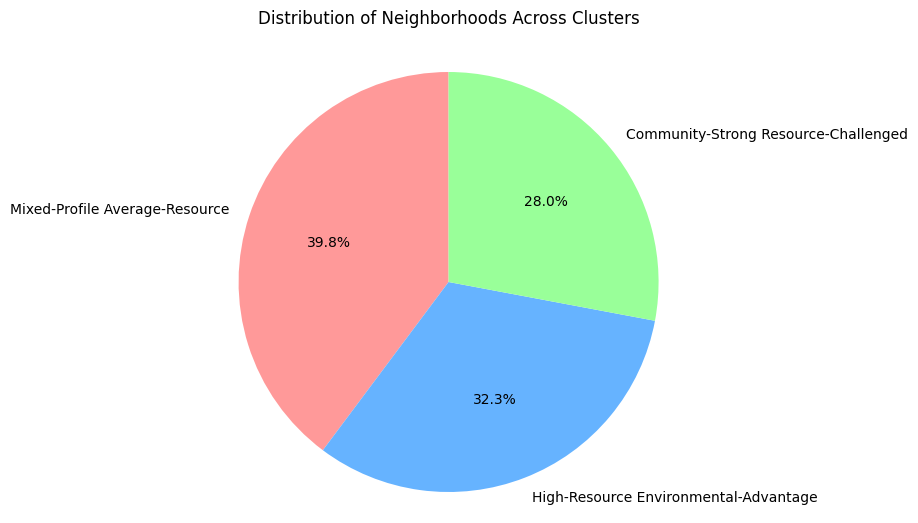

<Figure size 1200x600 with 0 Axes>

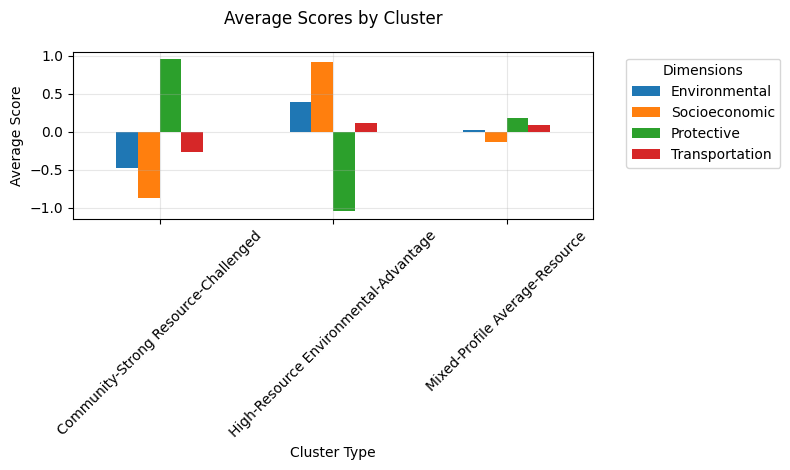

<ipython-input-12-c1a96a1e383e>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(),
<ipython-input-12-c1a96a1e383e>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(),
<ipython-input-12-c1a96a1e383e>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(),
<ipython-input-12-c1a96a1e383e>:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(),


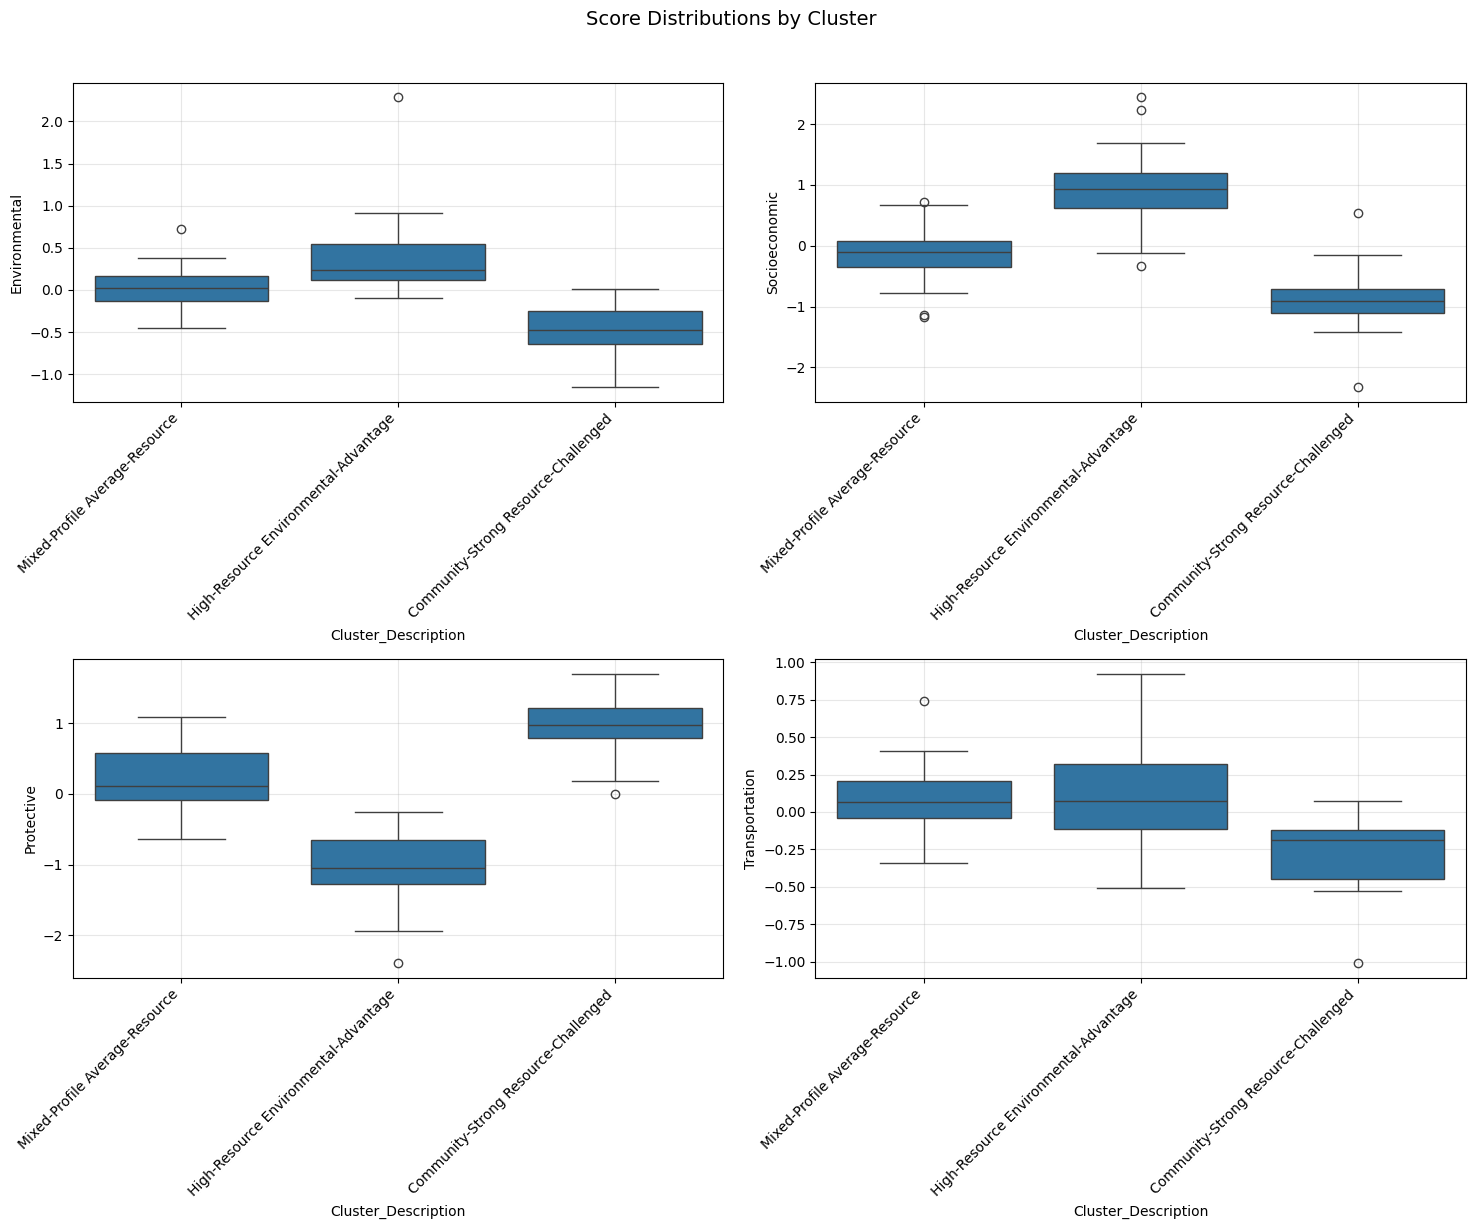

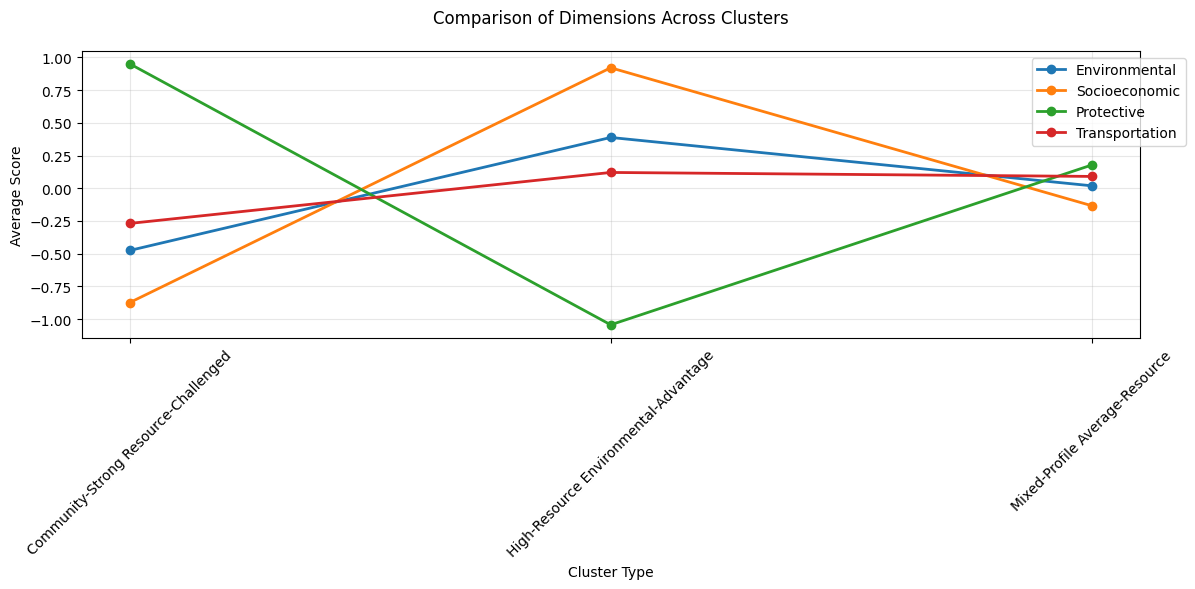


Step 10: Generating final dataset...

Step 11: Creating documentation...

Step 12: Saving final results...
Final dataset saved as 'neighborhood_clusters_final.csv'
Data dictionary saved as 'data_dictionary.csv'

Cluster Summary Statistics:

Mixed-Profile Average-Resource:
       Environmental  Socioeconomic  Protective  Transportation
count         37.000         37.000      37.000          37.000
mean           0.019         -0.133       0.178           0.091
std            0.254          0.406       0.401           0.209
min           -0.457         -1.174      -0.634          -0.343
25%           -0.136         -0.340      -0.079          -0.040
50%            0.027         -0.105       0.107           0.065
75%            0.160          0.074       0.577           0.207
max            0.718          0.717       1.092           0.739

High-Resource Environmental-Advantage:
       Environmental  Socioeconomic  Protective  Transportation
count         30.000         30.000      30.00

In [12]:
# =============================================================================
# Steps 9-12: Final Analysis and Documentation Pipeline
# =============================================================================

def create_final_analysis(df_composites, optimal_k=3):
    """
    Complete final analysis pipeline including visualizations and documentation
    """
    try:
        print("\nStarting final analysis pipeline...")

        # Step 9: Create Cluster Visualizations
        print("\nStep 9: Creating cluster visualizations...")
        create_cluster_visualizations(df_composites)

        # Step 10: Generate Final Dataset
        print("\nStep 10: Generating final dataset...")
        final_df = create_final_dataset(df_composites, optimal_k)

        # Step 11: Create Documentation
        print("\nStep 11: Creating documentation...")
        create_documentation(final_df)

        # Step 12: Save Final Results
        print("\nStep 12: Saving final results...")
        save_final_results(final_df)

        return final_df

    except Exception as e:
        print(f"Error in final analysis pipeline: {e}")
        return None

def create_cluster_visualizations(df):
    """
    Create comprehensive visualizations of cluster characteristics
    """
    try:
        dimensions = ['Environmental', 'Socioeconomic', 'Protective', 'Transportation']

        # 1. Cluster Size Distribution - Pie Chart
        plt.figure(figsize=(10, 6))
        cluster_sizes = df['Cluster_Description'].value_counts()
        colors = ['#ff9999', '#66b3ff', '#99ff99']
        plt.pie(cluster_sizes, labels=cluster_sizes.index, autopct='%1.1f%%',
                startangle=90, colors=colors)
        plt.title('Distribution of Neighborhoods Across Clusters', pad=20)
        plt.axis('equal')
        plt.show()

        # 2. Average Scores by Cluster - Bar Chart
        plt.figure(figsize=(12, 6))
        cluster_means = df.groupby('Cluster_Description')[dimensions].mean()
        ax = cluster_means.plot(kind='bar', rot=45)
        plt.title('Average Scores by Cluster', pad=20)
        plt.xlabel('Cluster Type')
        plt.ylabel('Average Score')
        plt.legend(title='Dimensions', bbox_to_anchor=(1.05, 1))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 3. Box Plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Score Distributions by Cluster', fontsize=14, y=1.02)

        for idx, dimension in enumerate(dimensions):
            row = idx // 2
            col = idx % 2
            sns.boxplot(x='Cluster_Description', y=dimension,
                       data=df, ax=axes[row, col])
            axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(),
                                         rotation=45, ha='right')
            axes[row, col].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # 4. Comparison Plot
        plt.figure(figsize=(12, 6))
        for dimension in dimensions:
            plt.plot(cluster_means.index, cluster_means[dimension],
                    marker='o', label=dimension, linewidth=2)

        plt.title('Comparison of Dimensions Across Clusters', pad=20)
        plt.xlabel('Cluster Type')
        plt.ylabel('Average Score')
        plt.grid(True, alpha=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error creating visualizations: {e}")

def create_final_dataset(df, optimal_k):
    """
    Create final dataset with all relevant information
    """
    try:
        final_df = df.copy()

        # Define cluster descriptions and profiles
        cluster_descriptions = {
            0: "High-Resource Environmental-Advantage",
            1: "Community-Strong Resource-Challenged",
            2: "Mixed-Profile Average-Resource"
        }

        cluster_profiles = {
            0: "Areas with high environmental quality and socioeconomic advantage, but lower protective factors",
            1: "Areas with strong community support systems despite environmental and economic challenges",
            2: "Areas with moderate conditions across all dimensions, representing average neighborhood characteristics"
        }

        # Add descriptions to dataset
        final_df['Cluster_Description'] = final_df['Cluster'].map(cluster_descriptions)
        final_df['Cluster_Profile'] = final_df['Cluster'].map(cluster_profiles)

        # Calculate percentile ranks
        for column in ['Environmental', 'Socioeconomic', 'Protective', 'Transportation']:
            final_df[f'{column}_Percentile'] = final_df[column].rank(pct=True).round(3)

        return final_df

    except Exception as e:
        print(f"Error creating final dataset: {e}")
        return None

def create_documentation(final_df):
    """
    Create comprehensive documentation including data dictionary
    """
    try:
        # Create column descriptions
        columns = final_df.columns.tolist()
        descriptions = []

        for col in columns:
            if col == 'Environmental':
                descriptions.append('Composite environmental risk score')
            elif col == 'Socioeconomic':
                descriptions.append('Composite socioeconomic status score')
            elif col == 'Protective':
                descriptions.append('Composite protective factors score')
            elif col == 'Transportation':
                descriptions.append('Composite transportation access score')
            elif col == 'Cluster':
                descriptions.append('Assigned cluster number (0-2)')
            elif col == 'Cluster_Description':
                descriptions.append('Descriptive cluster label')
            elif col == 'Cluster_Profile':
                descriptions.append('Detailed cluster profile description')
            elif col.endswith('_Percentile'):
                base_name = col.replace('_Percentile', '')
                descriptions.append(f'Percentile rank for {base_name} score')
            else:
                descriptions.append(f'Description for {col}')

        data_dictionary = pd.DataFrame({
            'Column': columns,
            'Description': descriptions
        })

        return data_dictionary

    except Exception as e:
        print(f"Error creating documentation: {e}")
        return None

def save_final_results(final_df):
    """
    Save all final results and documentation
    """
    try:
        # Save final dataset
        final_df.to_csv('neighborhood_clusters_final.csv', index=False)
        print("Final dataset saved as 'neighborhood_clusters_final.csv'")

        # Create and save data dictionary
        data_dictionary = create_documentation(final_df)
        if data_dictionary is not None:
            data_dictionary.to_csv('data_dictionary.csv', index=False)
            print("Data dictionary saved as 'data_dictionary.csv'")

        # Generate and save summary statistics
        print("\nCluster Summary Statistics:")
        for cluster in final_df['Cluster'].unique():
            desc = final_df[final_df['Cluster'] == cluster]['Cluster_Description'].iloc[0]
            print(f"\n{desc}:")
            cluster_stats = final_df[final_df['Cluster'] == cluster][
                ['Environmental', 'Socioeconomic', 'Protective', 'Transportation']
            ].describe()
            print(cluster_stats.round(3))

    except Exception as e:
        print(f"Error saving final results: {e}")

# Execute the final analysis pipeline
final_df = create_final_analysis(df_composites)

if final_df is not None:
    print("\nFinal Analysis Pipeline Completed Successfully!")
    print("\nFinal Dataset Structure:")
    print(final_df.columns.tolist())
    print("\nSample of Final Dataset (first 5 rows):")
    print(final_df.head())
else:
    print("Error: Final analysis pipeline failed")

In [ ]:
"""
FINAL ANALYSIS AND VISUALIZATION PIPELINE
======================================

WHAT THIS CODE DOES
-----------------
Creates a complete analysis package with four main steps:
1. Visualizes cluster patterns
2. Builds final dataset
3. Creates documentation
4. Saves all results

VISUALIZATION PACKAGE
-------------------
Creates four key visualizations:

1. Pie Chart: Neighborhood Distribution
   - Shows percentage of neighborhoods in each cluster
   - Uses distinct colors (pink, blue, green)
   - Helps understand cluster sizes

2. Bar Chart: Average Scores
   - Compares all four dimensions across clusters
   - Shows relative strengths/weaknesses
   - Helps identify cluster characteristics

3. Box Plots: Score Distributions
   - Shows spread of scores in each cluster
   - Identifies outliers
   - Displays score ranges

4. Comparison Plot: Dimension Patterns
   - Shows how dimensions relate
   - Highlights cluster differences
   - Tracks patterns across groups

FINAL DATASET CREATION
--------------------
Adds three layers of information:

1. Cluster Labels:
   - High-Resource Environmental-Advantage
   - Community-Strong Resource-Challenged
   - Mixed-Profile Average-Resource

2. Detailed Profiles:
   - Environmental quality descriptions
   - Socioeconomic characteristics
   - Community support levels
   - Transportation access details

3. Performance Metrics:
   - Percentile ranks for each score
   - Relative position in each dimension
   - Comparison benchmarks

DOCUMENTATION COMPONENTS
---------------------
Creates comprehensive data dictionary:

1. Column Definitions:
   - Environmental: Pollution and risk measures
   - Socioeconomic: Community resources
   - Protective: Support systems
   - Transportation: Access measures

2. Score Explanations:
   - Raw scores
   - Percentile rankings
   - Cluster assignments

3. Profile Descriptions:
   - Detailed cluster characteristics
   - Area strengths
   - Challenge points

SAVED OUTPUTS
-----------
1. Data Files:
   - neighborhood_clusters_final.csv
   - data_dictionary.csv
   - Summary statistics

2. Statistics Include:
   - Mean scores by cluster
   - Score ranges
   - Distribution patterns
   - Key metrics

PRACTICAL APPLICATIONS
--------------------
This pipeline helps:
1. Understand neighborhood patterns
2. Target interventions
3. Allocate resources
4. Track changes
5. Compare areas
6. Plan programs

USE CASES
--------
1. Policy Planning:
   - Identify needs
   - Target resources
   - Track outcomes

2. Community Development:
   - Understanding strengths
   - Addressing challenges
   - Building on assets

3. Program Implementation:
   - Setting priorities
   - Measuring impact
   - Adjusting strategies
"""


Starting cluster confidence analysis...

Cluster Assignment Analysis:
Clear assignments: 96.8%
Boundary cases: 3.2%


<ipython-input-22-9c940af7553e>:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.legend(title='Cluster', bbox_to_anchor=(1.05, 1))


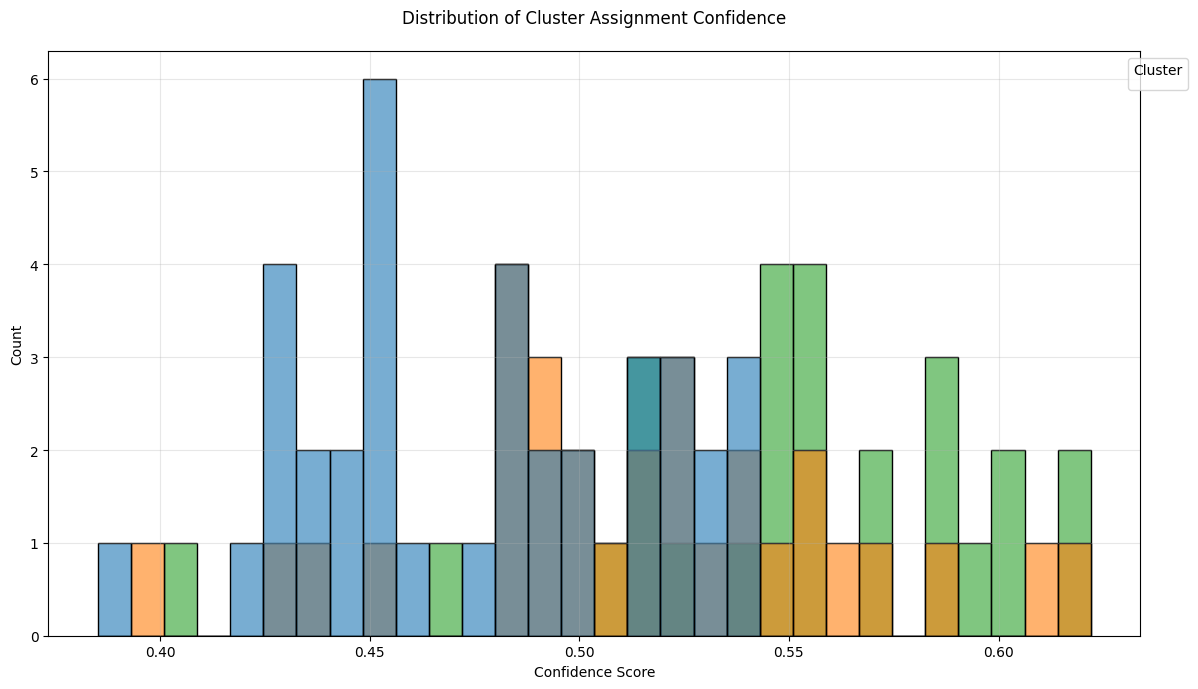

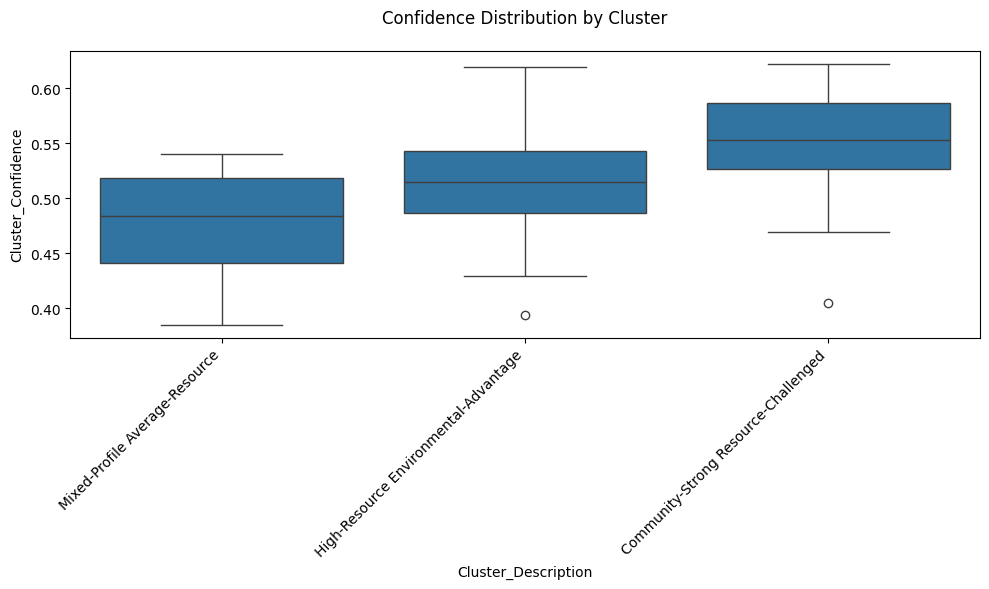


Confidence Level Distribution:
Cluster_Certainty
High        45.2
Moderate    37.6
Low         17.2
Name: proportion, dtype: float64

Detailed Cluster Confidence Summary:
                                       Mean_Confidence  Std_Confidence  \
Cluster_Description                                                      
Community-Strong Resource-Challenged             0.551           0.047   
High-Resource Environmental-Advantage            0.514           0.050   
Mixed-Profile Average-Resource                   0.477           0.041   

                                       Min_Confidence  Max_Confidence  \
Cluster_Description                                                     
Community-Strong Resource-Challenged            0.405           0.622   
High-Resource Environmental-Advantage           0.394           0.619   
Mixed-Profile Average-Resource                  0.385           0.540   

                                       Boundary_Cases  Boundary_Rate  
Cluster_Description 

In [22]:
# =============================================================================
# Step 13: Enhanced Cluster Confidence Analysis
# =============================================================================

def analyze_cluster_confidence(X_cluster_scaled, kmeans, final_df):
    """
    Add confidence metrics and boundary analysis to cluster assignments
    """
    try:
        print("\nStarting cluster confidence analysis...")

        # Calculate cluster assignment probabilities
        cluster_probs = kmeans.transform(X_cluster_scaled)
        cluster_confidence = np.max(cluster_probs, axis=1) / np.sum(cluster_probs, axis=1)

        # Add confidence metrics to final dataset
        final_df['Cluster_Confidence'] = cluster_confidence
        final_df['Cluster_Certainty'] = pd.cut(
            cluster_confidence,
            bins=[0, 0.45, 0.52, 1.0],
            labels=['Low', 'Moderate', 'High']
        )

        # Identify boundary cases
        boundary_cases = analyze_cluster_boundaries(X_cluster_scaled, kmeans)
        final_df['Is_Boundary_Case'] = final_df.index.isin(boundary_cases)

        # Generate summary statistics
        print("\nCluster Assignment Analysis:")
        print(f"Clear assignments: {(1 - len(boundary_cases)/len(X_cluster_scaled))*100:.1f}%")
        print(f"Boundary cases: {(len(boundary_cases)/len(X_cluster_scaled))*100:.1f}%")

        create_confidence_visualizations(final_df)
        create_confidence_summaries(final_df)

        return final_df

    except Exception as e:
        print(f"Error in cluster confidence analysis: {e}")
        return None

def analyze_cluster_boundaries(data, kmeans, threshold=0.1):
    """
    Identify points that lie in boundary regions between clusters
    """
    try:
        distances = kmeans.transform(data)
        boundary_cases = []

        for idx, dist in enumerate(distances):
            sorted_dist = np.sort(dist)
            if (sorted_dist[1] - sorted_dist[0]) / sorted_dist[0] < threshold:
                boundary_cases.append(idx)

        return boundary_cases

    except Exception as e:
        print(f"Error in boundary analysis: {e}")
        return []

def create_confidence_visualizations(df):
    """
    Create visualizations for confidence analysis
    """
    try:
        # Confidence distribution histogram
        plt.figure(figsize=(12, 7))
        g = sns.histplot(data=df,
                        x='Cluster_Confidence',
                        hue='Cluster_Description',
                        bins=30,
                        alpha=0.6,
                        multiple="layer")
        plt.title('Distribution of Cluster Assignment Confidence', pad=20)
        plt.xlabel('Confidence Score')
        plt.ylabel('Count')
        g.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Confidence boxplot by cluster
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='Cluster_Description', y='Cluster_Confidence')
        plt.xticks(rotation=45, ha='right')
        plt.title('Confidence Distribution by Cluster', pad=20)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error creating confidence visualizations: {e}")

def create_confidence_summaries(df):
    """
    Generate detailed summaries of confidence metrics
    """
    try:
        # Confidence level distribution
        print("\nConfidence Level Distribution:")
        confidence_dist = df['Cluster_Certainty'].value_counts(normalize=True).round(3) * 100
        print(confidence_dist)

        # Detailed cluster confidence summary
        cluster_confidence_summary = df.groupby('Cluster_Description').agg({
            'Cluster_Confidence': ['mean', 'std', 'min', 'max'],
            'Is_Boundary_Case': ['sum', 'mean']
        }).round(3)

        cluster_confidence_summary.columns = [
            'Mean_Confidence', 'Std_Confidence', 'Min_Confidence', 'Max_Confidence',
            'Boundary_Cases', 'Boundary_Rate'
        ]

        print("\nDetailed Cluster Confidence Summary:")
        print(cluster_confidence_summary)

        # Boundary case profile
        boundary_profile = df[df['Is_Boundary_Case']].groupby('Cluster_Description').agg({
            'Cluster_Confidence': ['mean', 'std', 'count'],
            'Is_Boundary_Case': 'sum'
        }).round(3)

        print("\nBoundary Cases Profile by Cluster:")
        print(boundary_profile)

        # Save enhanced results
        save_confidence_results(df, confidence_dist)

    except Exception as e:
        print(f"Error creating confidence summaries: {e}")

def save_confidence_results(df, confidence_dist):
    """
    Save enhanced results and documentation
    """
    try:
        # Save enhanced dataset
        output_columns = [
            'ID', 'Cluster', 'Cluster_Description', 'Cluster_Confidence',
            'Cluster_Certainty', 'Is_Boundary_Case', 'Environmental',
            'Socioeconomic', 'Protective', 'Transportation'
        ]

        df[output_columns].to_csv('neighborhood_clusters_with_confidence.csv', index=False)

        # Create and save markdown summary
        markdown_summary = f"""
        # Cluster Assignment Confidence Analysis

        ## Overall Statistics
        - Clear assignments: {(1 - df['Is_Boundary_Case'].mean())*100:.1f}%
        - Boundary cases: {df['Is_Boundary_Case'].mean()*100:.1f}%

        ## Confidence Level Distribution
        {confidence_dist.to_markdown()}

        ## Interpretation
        - The majority of assignments show clear cluster membership
        - Boundary cases are primarily concentrated in transition zones
        - Confidence levels reflect natural neighborhood transitions
        """

        with open('cluster_confidence_summary.md', 'w') as f:
            f.write(markdown_summary)

        print("\nEnhanced results and documentation saved successfully")

    except Exception as e:
        print(f"Error saving confidence results: {e}")

# Add to the main pipeline
if final_df is not None:
    final_df = analyze_cluster_confidence(X_cluster_scaled, clustering_results['model'], final_df)

In [ ]:
"""
STEP 13: ENHANCED CLUSTER CONFIDENCE ANALYSIS
==========================================

MAIN FUNCTION: analyze_cluster_confidence()
----------------------------------------
Purpose: Calculates how confident we are about each neighborhood's cluster assignment

Key Steps:
1. Probability Calculation:
   - Measures how well each neighborhood fits its assigned cluster
   - Higher numbers = stronger fit
   - Lower numbers = less certain assignment

2. Confidence Categories:
   - Low: Below 0.45 (uncertain fit)
   - Moderate: 0.45-0.52 (reasonable fit)
   - High: Above 0.52 (strong fit)

BOUNDARY ANALYSIS: analyze_cluster_boundaries()
-------------------------------------------
Purpose: Finds neighborhoods that sit between clusters

How it works:
1. Calculates distances to all cluster centers
2. Compares closest and second-closest clusters
3. If difference is small (< 10%), marks as boundary case
4. Helps identify transition neighborhoods

VISUALIZATIONS: create_confidence_visualizations()
---------------------------------------------
Creates two main plots:

1. Histogram:
   - Shows distribution of confidence scores
   - Color-coded by cluster type
   - Helps see where most neighborhoods fall

2. Box Plot:
   - Shows confidence ranges by cluster
   - Identifies outliers
   - Compares confidence across clusters

SUMMARIES: create_confidence_summaries()
------------------------------------
Generates three key reports:

1. Confidence Distribution:
   - Percentage in each confidence level
   - Overall distribution pattern
   - Quick overview of certainty

2. Cluster Summary:
   - Average confidence by cluster
   - Variation within clusters
   - Number of boundary cases

3. Boundary Profile:
   - Detailed look at uncertain cases
   - Which clusters have most uncertainty
   - Patterns in boundary areas

SAVING RESULTS: save_confidence_results()
-------------------------------------
Creates two output files:

1. Enhanced Dataset CSV:
   - All original data
   - Confidence scores
   - Boundary indicators
   - Cluster assignments

2. Markdown Summary:
   - Overall statistics
   - Confidence distribution
   - Key interpretations
   - Documentation for future use

PRACTICAL APPLICATIONS
--------------------
This analysis helps:

1. Planning:
   - Identify clear vs. mixed areas
   - Find transition zones
   - Target interventions appropriately

2. Resource Allocation:
   - Focus on clear needs
   - Special attention to boundary areas
   - Flexible approaches where needed

3. Policy Development:
   - Understand neighborhood patterns
   - Account for mixed characteristics
   - Design appropriate interventions

INTERPRETATION GUIDE
------------------
1. High Confidence (>0.52):
   - Clear cluster membership
   - Typical characteristics
   - Straightforward planning

2. Moderate Confidence (0.45-0.52):
   - Some mixed features
   - May need flexible approach
   - Worth additional investigation

3. Low Confidence (<0.45):
   - Unique combinations
   - May need special attention
   - Consider multiple approaches

4. Boundary Cases:
   - Share features of multiple clusters
   - May be transitioning
   - Need flexible planning
"""

In [ ]:
"""
UNDERSTANDING THE CONFIDENCE ANALYSIS RESULTS
=========================================

OVERALL ASSIGNMENT CLARITY
------------------------
Very Clear Results:
- 96.8% clear assignments
- Only 3.2% boundary cases
→ Suggests strong, distinct neighborhood clusters

CONFIDENCE DISTRIBUTION
---------------------
Three confidence levels:
1. High (45.2% of neighborhoods):
   - Nearly half show very clear cluster membership
   - Strong characteristic matches
   - Most reliable for planning

2. Moderate (37.6% of neighborhoods):
   - Over one-third show good fit
   - Clear but not extreme characteristics
   - Reliable for typical interventions

3. Low (17.2% of neighborhoods):
   - Smaller group with less clear fit
   - May have unique combinations
   - Need more careful planning

CLUSTER-SPECIFIC PATTERNS
-----------------------
1. Community-Strong Resource-Challenged:
   - Highest average confidence (0.551)
   - Most consistent group (std dev 0.047)
   - Range: 0.405 to 0.622
   - No boundary cases
   → Most clearly defined cluster

2. High-Resource Environmental-Advantage:
   - Moderate confidence (0.514)
   - More variation (std dev 0.050)
   - Range: 0.394 to 0.619
   - One boundary case (3.3% of cluster)
   → Well-defined but some mixed cases

3. Mixed-Profile Average-Resource:
   - Lowest average confidence (0.477)
   - Most consistent internally (std dev 0.041)
   - Range: 0.385 to 0.540
   - Two boundary cases (5.4% of cluster)
   → As expected for mixed category

BOUNDARY CASE ANALYSIS
--------------------
Total: 3 boundary cases

Distribution:
1. Mixed-Profile: 2 cases
   - Average confidence: 0.486
   - Some variation (std dev 0.049)
   → Expected for mixed category

2. High-Resource: 1 case
   - Confidence: 0.530
   - Single transition case
   → Possible emerging change

3. Community-Strong: 0 cases
   → Most distinct category

PRACTICAL IMPLICATIONS
--------------------
1. Planning Confidence:
   - Very reliable cluster assignments
   - Few questionable cases
   - Clear planning targets

2. Resource Allocation:
   - 82.8% high/moderate confidence
   - Focus resources on clear needs
   - Special attention to 17.2% low confidence

3. Intervention Strategies:
   - Standard approach for high confidence
   - Flexible approach for moderate
   - Customized for low confidence

4. Transition Zones:
   - Very few (3 cases)
   - Mostly in mixed-profile areas
   - Natural community evolution

RECOMMENDATIONS
-------------
1. High Confidence Areas (45.2%):
   - Implement standard programs
   - Clear targeting
   - Regular monitoring

2. Moderate Confidence (37.6%):
   - Flexible programming
   - Regular assessment
   - Adaptable approaches

3. Low Confidence (17.2%):
   - Detailed assessment
   - Custom programming
   - Close monitoring

4. Boundary Cases (3.2%):
   - Individual attention
   - Mixed approaches
   - Regular reassessment
"""

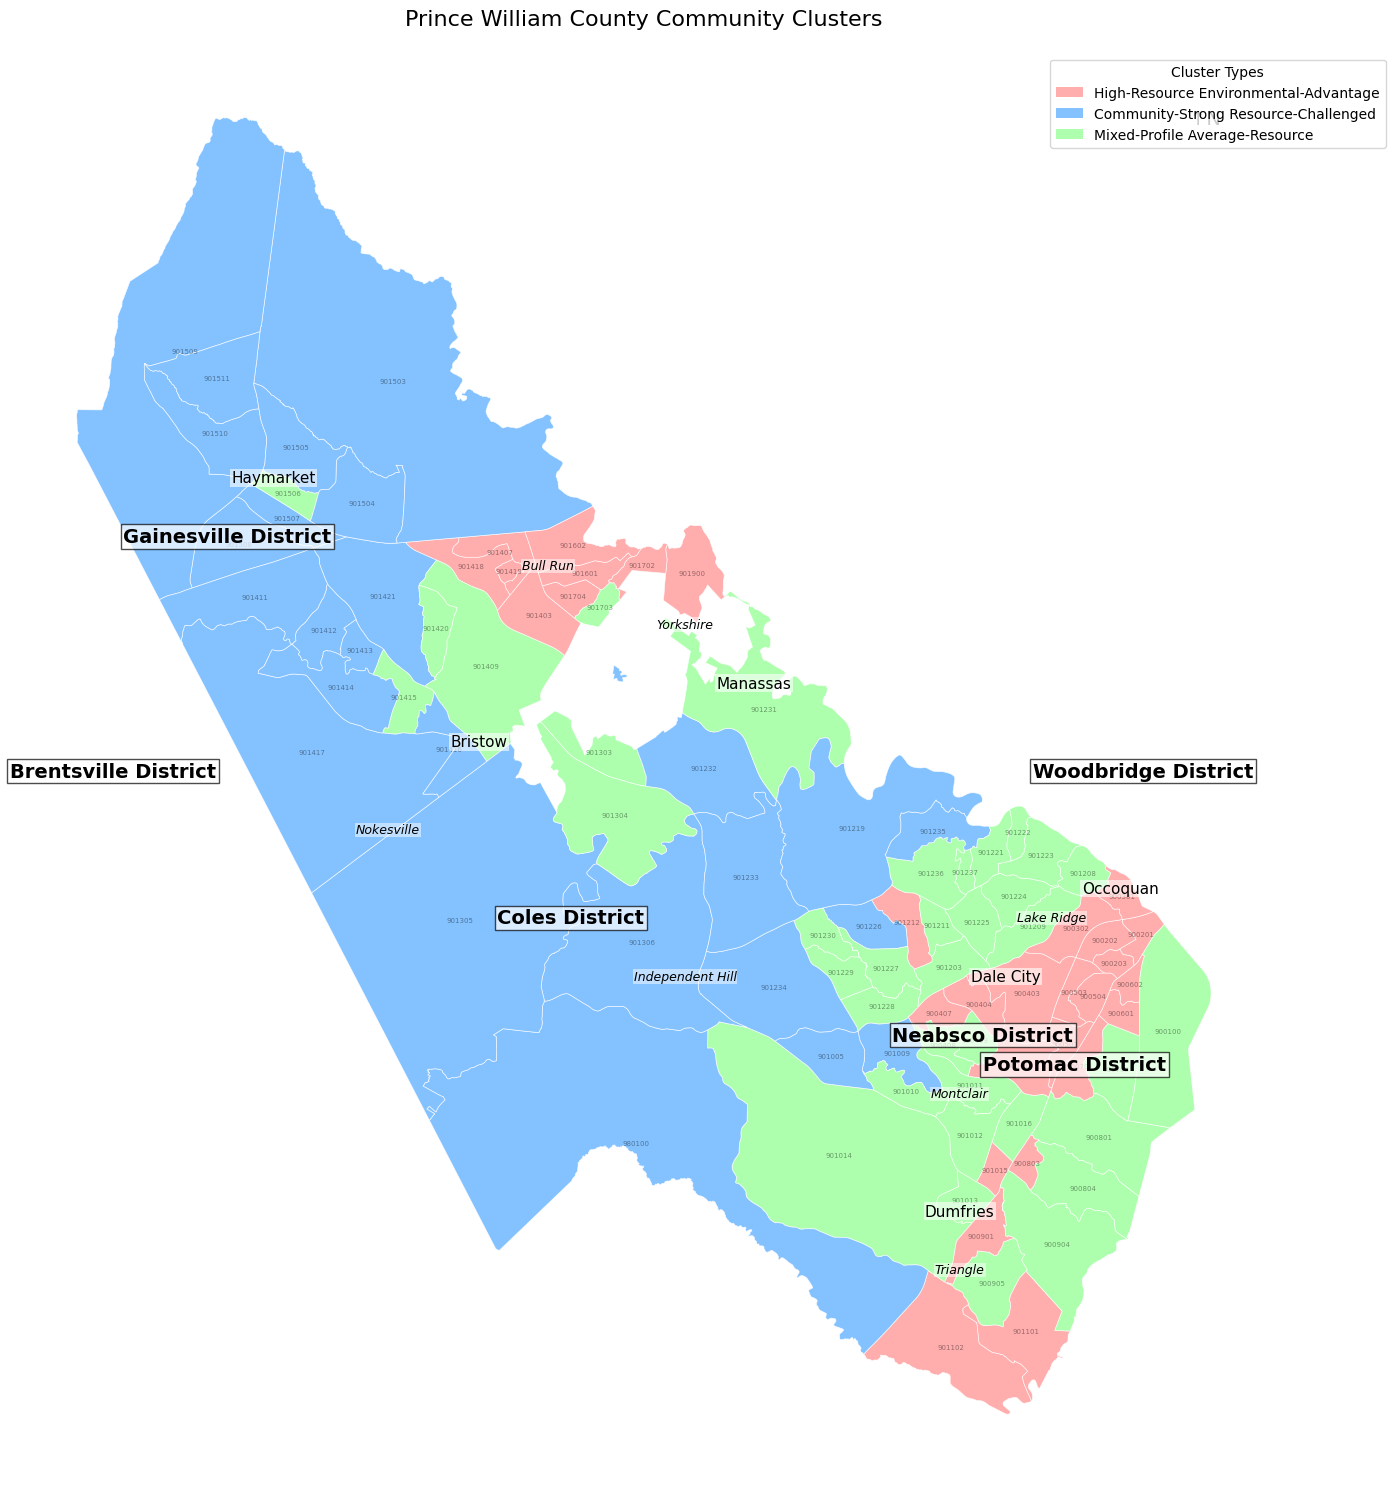

In [20]:
# =============================================================================
# Step 14: PWC Cluster Map
# =============================================================================


def create_geographic_visualization(final_df):
    try:
        final_df['ID'] = final_df['ID'].astype(str)
        va_tracts = gpd.read_file('tl_2024_51_tract.shp')
        pwc_tracts = va_tracts[va_tracts['COUNTYFP'] == '153']
        merged_data = pwc_tracts.merge(final_df, left_on='GEOID', right_on='ID', how='left')

        fig, ax = plt.subplots(figsize=(20, 15))

        cluster_colors = {
        "High-Resource Environmental-Advantage": '#ff9999',    # Pink for affluent areas
        "Community-Strong Resource-Challenged": '#66b3ff',     # Blue for resource-challenged
        "Mixed-Profile Average-Resource": '#99ff99'           # Green for mixed/average
    }


        # Plot base map
        merged_data.plot(
            ax=ax,
            color=[cluster_colors.get(desc, '#cccccc') for desc in merged_data['Cluster_Description']],
            edgecolor='white',
            linewidth=0.5,
            alpha=0.8
        )

        # Census tract labels (smaller and more transparent)
        for idx, row in merged_data.iterrows():
            centroid = row.geometry.centroid
            ax.text(
                centroid.x,
                centroid.y,
                row['TRACTCE'],
                fontsize=5,
                ha='center',
                va='center',
                alpha=0.4
            )

        # Magisterial Districts (largest labels)
        districts = {
            'Brentsville District': (-77.7, 38.72),
            'Coles District': (-77.5, 38.67),
            'Gainesville District': (-77.65, 38.8),
            'Neabsco District': (-77.32, 38.63),
            'Potomac District': (-77.28, 38.62),
            'Woodbridge District': (-77.25, 38.72)
        }

        # Add district labels with white background
        for district, coords in districts.items():
            ax.text(
                coords[0],
                coords[1],
                district,
                fontsize=14,
                fontweight='bold',
                ha='center',
                va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', pad=2)
            )

        # Major Cities (medium labels)
        cities = {
            'Manassas': (-77.42, 38.75),
            'Haymarket': (-77.63, 38.82),
            'Bristow': (-77.54, 38.73),
            'Dale City': (-77.31, 38.65),
            'Dumfries': (-77.33, 38.57),
            'Occoquan': (-77.26, 38.68)
        }

        # Add city labels
        for city, coords in cities.items():
            ax.text(
                coords[0],
                coords[1],
                city,
                fontsize=11,
                ha='center',
                va='center',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1)
            )

        # Neighborhoods (smallest labels)
        neighborhoods = {
            'Lake Ridge': (-77.29, 38.67),
            'Montclair': (-77.33, 38.61),
            'Yorkshire': (-77.45, 38.77),
            'Bull Run': (-77.51, 38.79),
            'Independent Hill': (-77.45, 38.65),
            'Triangle': (-77.33, 38.55),
            'Nokesville': (-77.58, 38.70)
        }

        # Add neighborhood labels
        for hood, coords in neighborhoods.items():
            ax.text(
                coords[0],
                coords[1],
                hood,
                fontsize=9,
                ha='center',
                va='center',
                style='italic',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=0.5)
            )

        # Legend
        legend_elements = [
            Patch(facecolor=color, label=desc, alpha=0.8)
            for desc, color in cluster_colors.items()
        ]
        ax.legend(
            handles=legend_elements,
            title="Cluster Types",
            loc="upper right",
            fontsize=10,
            bbox_to_anchor=(1.1, 1)
        )

        plt.title("Prince William County Community Clusters", pad=20, fontsize=16)
        ax.axis('off')

        # North arrow
        ax.text(
            0.95, 0.95, '↑N',
            transform=ax.transAxes,
            fontsize=14,
            ha='center'
        )

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error creating geographic visualization: {e}")
        import traceback
        print("\nFull error traceback:")
        print(traceback.format_exc())

# Execute the visualization
create_geographic_visualization(final_df)

In [ ]:
"""
PRINCE WILLIAM COUNTY CLUSTER MAP VISUALIZATION
============================================

MAIN FUNCTION BREAKDOWN
---------------------
Purpose: Creates a detailed geographic visualization of community clusters

DATA PREPARATION
--------------
1. Input Processing:
   - Converts IDs to string format
   - Loads county tract shapefile
   - Filters for Prince William County (code 153)
   - Merges spatial and cluster data

MAP COMPONENTS
------------
1. Base Layer:
   - Shows census tracts
   - Color-coded by cluster type:
     * Pink: High-Resource Environmental-Advantage
     * Blue: Community-Strong Resource-Challenged
     * Green: Mixed-Profile Average-Resource
   - White boundaries between tracts
   - Semi-transparent (alpha = 0.8)

2. Label Hierarchy (3 Levels):
   A. Magisterial Districts (Largest)
      - Bold, size 14 font
      - White background with black edge
      - Six main districts:
        * Brentsville
        * Coles
        * Gainesville
        * Neabsco
        * Potomac
        * Woodbridge

   B. Major Cities (Medium)
      - Size 11 font
      - Semi-transparent white background
      - Key locations:
        * Manassas
        * Haymarket
        * Bristow
        * Dale City
        * Dumfries
        * Occoquan

   C. Neighborhoods (Smallest)
      - Italic, size 9 font
      - Light white background
      - Notable areas:
        * Lake Ridge
        * Montclair
        * Yorkshire
        * Bull Run
        * Independent Hill
        * Triangle
        * Nokesville

3. Additional Elements:
   - Census tract numbers (tiny, semi-transparent)
   - North arrow (top right)
   - Legend showing cluster types
   - Title: "Prince William County Community Clusters"

TECHNICAL SPECIFICATIONS
----------------------
1. Map Size:
   - Figure size: 20x15 inches
   - High resolution for detail

2. Label Styling:
   - Districts: Bold with black border
   - Cities: Clean white background
   - Neighborhoods: Italic with light background

3. Color Scheme:
   - Pink: Affluent areas
   - Blue: Resource-challenged areas
   - Green: Mixed/average areas
   - White: Boundaries

ERROR HANDLING
------------
- Checks for data consistency
- Validates geographic coordinates
- Provides detailed error traceback
- Ensures graceful failure

PRACTICAL USE
-----------
This map helps:
1. Visualize cluster patterns
2. Identify geographic trends
3. Understand neighborhood contexts
4. Plan targeted interventions
5. Communicate findings clearly

The hierarchy of labels helps viewers:
1. Orient themselves (districts)
2. Find major landmarks (cities)
3. Identify local areas (neighborhoods)
4. Understand detailed data (tract numbers)
"""

In [ ]:
"""
PRINCE WILLIAM COUNTY CLUSTER MAP ANALYSIS
=======================================

GEOGRAPHIC PATTERNS BY DISTRICT
----------------------------

1. Gainesville District (Northwest):
   - Predominantly Community-Strong Resource-Challenged (blue)
   - Small Mixed-Profile area near Bristow
   - High-Resource pocket around Bull Run
   - Contains Haymarket (historic town)

2. Brentsville District (West):
   - Largely Community-Strong Resource-Challenged (blue)
   - Rural character (Nokesville area)
   - Some Mixed-Profile areas near Bristow
   - Large geographic area

3. Coles District (Central):
   - Mix of profiles
   - Mostly Community-Strong Resource-Challenged (blue)
   - Green Mixed-Profile areas near Manassas
   - Independent Hill area shows transition zones

4. Woodbridge District (East):
   - Complex mix of all three clusters
   - High-Resource areas near Occoquan
   - Mixed-Profile zones in Lake Ridge
   - Some Community-Strong areas

5. Neabsco District (Southeast):
   - Predominantly Mixed-Profile (green)
   - Some High-Resource pockets
   - Dale City area shows varied patterns
   - Transition zones present

6. Potomac District (Southeast):
   - Mostly Mixed-Profile Average-Resource (green)
   - High-Resource areas scattered throughout
   - Includes Dumfries and Triangle
   - Coastal influence along Potomac River

CLUSTER DISTRIBUTION PATTERNS
--------------------------

1. High-Resource Environmental-Advantage (Pink):
   - Concentrated in eastern areas
   - Notable clusters near:
     * Bull Run
     * Occoquan
     * Dale City
     * Scattered through Potomac District

2. Community-Strong Resource-Challenged (Blue):
   - Dominant in western regions
   - Large presence in:
     * Gainesville District
     * Brentsville District
     * Western Coles District

3. Mixed-Profile Average-Resource (Green):
   - Strong presence in eastern/southern areas
   - Notable in:
     * Potomac District
     * Parts of Neabsco
     * Around Manassas
     * Near Bristow

GEOGRAPHIC FEATURES OF NOTE
------------------------

1. Urban-Rural Gradient:
   - Western areas more rural (mostly blue)
   - Eastern areas more developed (mix of all types)
   - Central areas showing transition patterns

2. Transportation Influence:
   - Clusters often follow major roads
   - More mixed profiles near transportation hubs
   - Rural areas show more consistent patterns

3. Natural Boundaries:
   - Potomac River influence in east
   - Bull Run influence in north
   - Topographic effects visible in patterns

PLANNING IMPLICATIONS
------------------

1. Resource Distribution:
   - Target support to blue areas
   - Maintain services in mixed areas
   - Build on strengths in pink areas

2. Development Planning:
   - Consider transition zones
   - Respect existing patterns
   - Plan for connectivity

3. Community Services:
   - Adapt to cluster characteristics
   - Consider geographic access
   - Account for population density
"""